In [1091]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

# Step 1: Data Understanding

In [1092]:
df = pd.read_csv('telecom_churn_data.csv')

In [1093]:
df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


In [1094]:
print(list(df.columns))

['mobile_number', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'last_date_of_month_9', 'arpu_6', 'arpu_7', 'arpu_8', 'arpu_9', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'onnet_mou_9', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 'offnet_mou_9', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_ic_mou_9', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'roam_og_mou_9', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2m_mou_9', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_t2c_mou_9', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'loc_og_mou_9', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2t_mou_9', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou

In [1095]:
null_df = pd.DataFrame(df.isnull().sum()/len(df.index)*100,columns=['C'])

In [1096]:
null_df.sort_values(by='C',ascending=False).head(50)

,C
arpu_3g_6,74.846748
night_pck_user_6,74.846748
total_rech_data_6,74.846748
arpu_2g_6,74.846748
max_rech_data_6,74.846748
fb_user_6,74.846748
av_rech_amt_data_6,74.846748
date_of_last_rech_data_6,74.846748
count_rech_2g_6,74.846748
count_rech_3g_6,74.846748


# Step 2: Filtering High Value Customers

**Define high-value customers as follows: Those who have recharged with an amount more than or equal to X, where X is the 70th percentile of the average recharge amount in the first two months (the good phase).**

**Hence, the columns to be considered are: total_rech_amt_6, total_rech_amt_7, av_rech_amt_data_6, av_rech_amt_data_7, total_rech_data_6, total_rech_data_7.**     

In [1097]:
#Checking the nulls in the dataset for these particular columns
print(df['total_rech_amt_6'].isnull().sum())
print(df['total_rech_amt_7'].isnull().sum())
print(df['av_rech_amt_data_6'].isnull().sum())
print(df['av_rech_amt_data_7'].isnull().sum())
print(df['total_rech_data_6'].isnull().sum())
print(df['total_rech_data_7'].isnull().sum())

0
0
74846
74428
74846
74428


In [1098]:
#Imputing the missing values with zeros
df['av_rech_amt_data_6'] = df['av_rech_amt_data_6'].fillna(0)
df['av_rech_amt_data_7'] = df['av_rech_amt_data_7'].fillna(0)
df['total_rech_data_6'] = df['total_rech_data_6'].fillna(0)
df['total_rech_data_7'] = df['total_rech_data_7'].fillna(0)

**Similarly, we take the same decision to impute the missing values as zeroes for corresponding columns in action phase 8.**

In [1099]:
print(df['total_rech_amt_8'].isnull().sum())
print(df['av_rech_amt_data_8'].isnull().sum())
print(df['total_rech_data_8'].isnull().sum())

0
73660
73660


In [1100]:
#Imputing the missing values with zeroes for the corresponding columns in the action phase - 8
df['av_rech_amt_data_8'] = df['av_rech_amt_data_8'].fillna(0)
df['total_rech_data_8'] = df['total_rech_data_8'].fillna(0)

In [1101]:
#Finding the totals for months 6 and 7 
df['voice_recharge_good'] = df['total_rech_amt_6'] + df['total_rech_amt_7']/2

In [1102]:
#Finding the total recharge data amount for months 6 and 7
df['data_recharge_good'] = (df['av_rech_amt_data_6']*df['total_rech_data_6']+df['av_rech_amt_data_7']*df['total_rech_data_7'])/2

In [1103]:
#Average recharge amount for months 6 & 7
df['rech_amt_good'] = df['voice_recharge_good']+df['data_recharge_good']

In [1104]:
#Finding the 70th percentile for finding the high value customers
high_val = df['rech_amt_good'].quantile(0.7)

In [1105]:
print(high_val)

677.0


In [1106]:
df['highvalcust'] = df['rech_amt_good'].apply(lambda x: 1 if x>high_val else 0)

In [1107]:
df[['highvalcust','rech_amt_good']]

,highvalcust,rech_amt_good
0,1,740.0
1,0,343.0
2,0,325.5
3,0,385.0
4,0,399.0
...,...,...
99994,0,115.0
99995,0,165.0
99996,0,158.0
99997,1,1792.5


In [1108]:
df['highvalcust'].value_counts()

0    70023
1    29976
Name: highvalcust, dtype: int64

In [1109]:
df = df[df['highvalcust']==1]

In [1110]:
df.shape

(29976, 230)

In [1111]:
#Check nulls again

In [1112]:
null_df = pd.DataFrame(df.isnull().sum()/len(df.index)*100,columns=['C'])

In [1113]:
null_df.sort_values(by='C',ascending=False).head(50)

,C
max_rech_data_9,52.098345
fb_user_9,52.098345
date_of_last_rech_data_9,52.098345
arpu_3g_9,52.098345
av_rech_amt_data_9,52.098345
total_rech_data_9,52.098345
arpu_2g_9,52.098345
night_pck_user_9,52.098345
count_rech_2g_9,52.098345
count_rech_3g_9,52.098345


# Step 3: Creating the column - Churn

**As per assignment guidelines: Now tag the churned customers (churn=1, else 0) based on the fourth month as follows: Those who have not made any calls (either incoming or outgoing) AND have not used mobile internet even once in the churn phase. The attributes you need to use to tag churners are:**
- total_ic_mou_9
- total_og_mou_9
- vol_2g_mb_9
- vol_3g_mb_9

In [1114]:
#Checking the nulls
df[['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9']].isnull().sum()/len(df.index)*100

total_ic_mou_9    0.0
total_og_mou_9    0.0
vol_2g_mb_9       0.0
vol_3g_mb_9       0.0
dtype: float64

In [1115]:
#Checking the nulls
df[['total_ic_mou_8','total_og_mou_8','vol_2g_mb_8','vol_3g_mb_8']].isnull().sum()/len(df.index)*100

total_ic_mou_8    0.0
total_og_mou_8    0.0
vol_2g_mb_8       0.0
vol_3g_mb_8       0.0
dtype: float64

In [1116]:
#Describe these columns
df[['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9']].describe()

,total_ic_mou_9,total_og_mou_9,vol_2g_mb_9,vol_3g_mb_9
count,29976.000000,29976.000000,29976.000000,29976.000000
mean,265.602725,505.338067,85.105071,333.547165
std,358.114302,657.521776,274.083497,940.582929
min,0.000000,0.000000,0.000000,0.000000
25%,51.475000,55.087500,0.000000,0.000000
50%,159.890000,302.695000,0.000000,0.000000
75%,344.322500,701.817500,29.552500,252.565000
max,7785.730000,11140.110000,8993.950000,39221.270000


In [1117]:
#Finding the total usage in Month 9
df['total_usage_9'] = df['total_ic_mou_9']+df['total_og_mou_9']+df['vol_2g_mb_9']+df['vol_3g_mb_9']

In [1118]:
#Creating the column - churn using the total usage in Month 9
df['churn'] = df['total_usage_9'].apply(lambda x: 'No' if x>0 else 'Yes')

In [1119]:
#Here we confirm if the churn column was prepared properly
print(df[['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9','churn']])

       total_ic_mou_9  total_og_mou_9  vol_2g_mb_9  vol_3g_mb_9 churn
0                0.00            0.00         0.00         0.00   Yes
7                0.00            0.00         0.00         0.00   Yes
8               34.91          142.18         0.00         0.00    No
16             334.56          255.74         0.00         0.00    No
17              87.13          631.08         0.00         0.00    No
...               ...             ...          ...          ...   ...
99984          149.26           14.44       723.41       232.56    No
99986          547.11         1095.24         9.14       941.48    No
99988          265.84          182.16         0.05       393.34    No
99997            2.21            0.00        85.67      4177.14    No
99998            0.00            0.00         0.00         0.00   Yes

[29976 rows x 5 columns]


In [1120]:
#Find the value_counts for the churn
df['churn'].value_counts()

No     27350
Yes     2626
Name: churn, dtype: int64

**Hence, there are 2433 people who have churned out of the 29953. Lets visualize it better in a pie chart.**

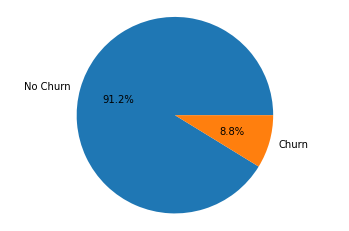

This is a class imbalance problem , which will be later handled using SMOTE technique


In [1121]:
#Pie chart for the target variable - Churn
labels = ['No Churn','Churn']
sizes = [df['churn'].value_counts()[0],df['churn'].value_counts()[1]]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%')
ax1.axis('equal')
plt.show()
plt.show()
print('This is a class imbalance problem , which will be later handled using SMOTE technique')

**As we have created the desired column 'churn', we can now remove all the columns for month 9 as guided in the problem statement.**

In [1122]:
text = '_9'
filtered_9 = list(filter(lambda x: True if text in x else False,list(df.columns)))

In [1123]:
filtered_9

['last_date_of_month_9',
 'arpu_9',
 'onnet_mou_9',
 'offnet_mou_9',
 'roam_ic_mou_9',
 'roam_og_mou_9',
 'loc_og_t2t_mou_9',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_9',
 'loc_og_mou_9',
 'std_og_t2t_mou_9',
 'std_og_t2m_mou_9',
 'std_og_t2f_mou_9',
 'std_og_t2c_mou_9',
 'std_og_mou_9',
 'isd_og_mou_9',
 'spl_og_mou_9',
 'og_others_9',
 'total_og_mou_9',
 'loc_ic_t2t_mou_9',
 'loc_ic_t2m_mou_9',
 'loc_ic_t2f_mou_9',
 'loc_ic_mou_9',
 'std_ic_t2t_mou_9',
 'std_ic_t2m_mou_9',
 'std_ic_t2f_mou_9',
 'std_ic_t2o_mou_9',
 'std_ic_mou_9',
 'total_ic_mou_9',
 'spl_ic_mou_9',
 'isd_ic_mou_9',
 'ic_others_9',
 'total_rech_num_9',
 'total_rech_amt_9',
 'max_rech_amt_9',
 'date_of_last_rech_9',
 'last_day_rch_amt_9',
 'date_of_last_rech_data_9',
 'total_rech_data_9',
 'max_rech_data_9',
 'count_rech_2g_9',
 'count_rech_3g_9',
 'av_rech_amt_data_9',
 'vol_2g_mb_9',
 'vol_3g_mb_9',
 'arpu_3g_9',
 'arpu_2g_9',
 'night_pck_user_9',
 'monthly_2g_9',
 'sachet_2g_9',
 'monthly_3g_9',
 

In [1124]:
#Dropping the columns for September
df = df.drop(filtered_9,axis = 1)

In [1125]:
#No of columns
df.shape

(29976, 177)

# Step 3: Data Cleaning

In [1126]:
null_df = pd.DataFrame(df.isnull().sum()/len(df.index)*100,columns=['C'])
null_df.sort_values(by='C',ascending=False).head(50)

,C
count_rech_2g_8,49.809848
date_of_last_rech_data_8,49.809848
arpu_3g_8,49.809848
fb_user_8,49.809848
arpu_2g_8,49.809848
max_rech_data_8,49.809848
count_rech_3g_8,49.809848
night_pck_user_8,49.809848
date_of_last_rech_data_7,47.641446
max_rech_data_7,47.641446


**As per assignment guidelines** <br>
We will be focusing on usage based churn and these columns are having very high nulls. Hence below featues related to revenue will be dropped.

In [1127]:
for  column in df.columns:
    if 'rech' in column:
        print(column)
        df = df.drop(column,axis=1)
    elif 'arpu' in column:
        print(column)
        df = df.drop(column,axis=1)
    elif 'last_date_of_month' in column:
        print(column)
        df = df.drop(column,axis=1)

last_date_of_month_6
last_date_of_month_7
last_date_of_month_8
arpu_6
arpu_7
arpu_8
total_rech_num_6
total_rech_num_7
total_rech_num_8
total_rech_amt_6
total_rech_amt_7
total_rech_amt_8
max_rech_amt_6
max_rech_amt_7
max_rech_amt_8
date_of_last_rech_6
date_of_last_rech_7
date_of_last_rech_8
date_of_last_rech_data_6
date_of_last_rech_data_7
date_of_last_rech_data_8
total_rech_data_6
total_rech_data_7
total_rech_data_8
max_rech_data_6
max_rech_data_7
max_rech_data_8
count_rech_2g_6
count_rech_2g_7
count_rech_2g_8
count_rech_3g_6
count_rech_3g_7
count_rech_3g_8
av_rech_amt_data_6
av_rech_amt_data_7
av_rech_amt_data_8
arpu_3g_6
arpu_3g_7
arpu_3g_8
arpu_2g_6
arpu_2g_7
arpu_2g_8
voice_recharge_good
data_recharge_good
rech_amt_good


In [1128]:
null_df = pd.DataFrame(df.isnull().sum()/len(df.index)*100,columns=['C'])
null_df.sort_values(by='C',ascending=False).head(50)

,C
night_pck_user_8,49.809848
fb_user_8,49.809848
fb_user_7,47.641446
night_pck_user_7,47.641446
night_pck_user_6,47.117694
fb_user_6,47.117694
loc_ic_t2m_mou_8,4.153323
std_og_t2t_mou_8,4.153323
loc_ic_t2f_mou_8,4.153323
loc_og_mou_8,4.153323


**Handling the columns: night_pck_user & fb_user**

In [1129]:
df.pivot_table(values = 'night_pck_user_6', 
                      index = 'churn',  
                      aggfunc = 'sum')

,night_pck_user_6
churn,
No,354.0
Yes,36.0


In [1130]:
df.pivot_table(values = 'night_pck_user_7', 
                      index = 'churn',  
                      aggfunc = 'sum')

,night_pck_user_7
churn,
No,333.0
Yes,22.0


In [1131]:
df.pivot_table(values = 'night_pck_user_8', 
                      index = 'churn',  
                      aggfunc = 'sum')

,night_pck_user_8
churn,
No,320.0
Yes,9.0


**Seeing the night_pck_user in Good & action phases, we conclude that this is not affecting churn much. These columns can be dropped.**

In [1132]:
df = df.drop(['night_pck_user_6','night_pck_user_7','night_pck_user_8'],axis=1)

In [1133]:
df.shape

(29976, 129)

**Converting Fb_user to categorical columns**

In [1134]:
df['fb_user_good'] = df['fb_user_6'] + df['fb_user_7']

In [1135]:
df['fb_user_good'].value_counts()

2.0    12305
0.0      685
1.0      323
Name: fb_user_good, dtype: int64

In [1136]:
#Converting Fb_user to categorical columns
def fill(x):
    if x==0.0: return 'No'
    elif x>0: return 'Yes'
    else: return 'Unknown'
fb_user_columns = ['fb_user_good','fb_user_8']

for column in fb_user_columns:
    df[column] = df[column].apply(fill)
    df[column] = df[column].astype('str')
    
df['fb_user_good'].value_counts()

Unknown    16663
Yes        12628
No           685
Name: fb_user_good, dtype: int64

In [1137]:
df = df.drop(['fb_user_6','fb_user_7'],axis=1)
df = df.rename(columns={'fb_user_8': 'fb_user_action'})

In [1138]:
df['fb_user_good'].value_counts()

Unknown    16663
Yes        12628
No           685
Name: fb_user_good, dtype: int64

In [1139]:
#Dropping mobile number
df=df.drop('mobile_number',axis=1)

In [1140]:
null_df = pd.DataFrame(df.isnull().sum()/len(df.index)*100,columns=['C'])
null_df.sort_values(by='C',ascending=False).head(50)

,C
loc_ic_t2m_mou_8,4.153323
loc_og_t2f_mou_8,4.153323
loc_og_mou_8,4.153323
std_og_t2t_mou_8,4.153323
std_og_t2m_mou_8,4.153323
std_og_t2f_mou_8,4.153323
std_og_t2c_mou_8,4.153323
std_og_mou_8,4.153323
isd_og_mou_8,4.153323
spl_og_mou_8,4.153323


In [1141]:
for column in df.select_dtypes(exclude=['object']).columns.to_list():
    median = df[column].median()
    df[column] = df[column].fillna(median)

In [1142]:
null_df = pd.DataFrame(df.isnull().sum()/len(df.index)*100,columns=['C'])
null_df.sort_values(by='C',ascending=False).head(50)

,C
circle_id,0.0
std_ic_t2o_mou_7,0.0
isd_ic_mou_8,0.0
isd_ic_mou_7,0.0
isd_ic_mou_6,0.0
spl_ic_mou_8,0.0
spl_ic_mou_7,0.0
spl_ic_mou_6,0.0
total_ic_mou_8,0.0
total_ic_mou_7,0.0


### Understanding Data

circle_id


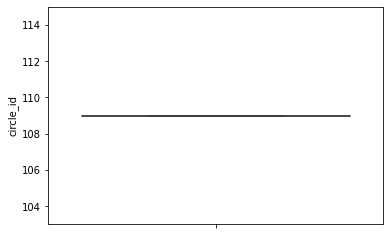

loc_og_t2o_mou


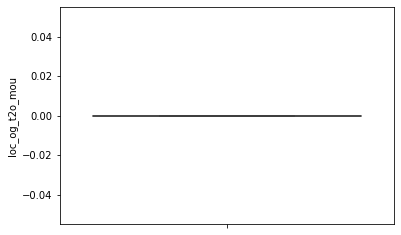

std_og_t2o_mou


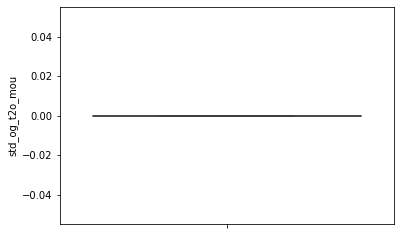

loc_ic_t2o_mou


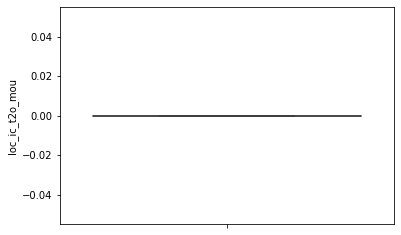

onnet_mou_6


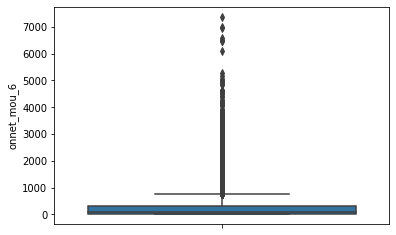

onnet_mou_7


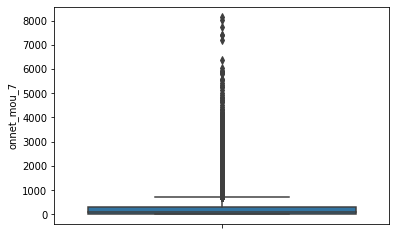

onnet_mou_8


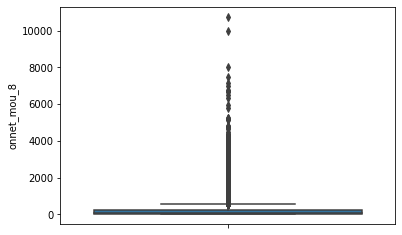

offnet_mou_6


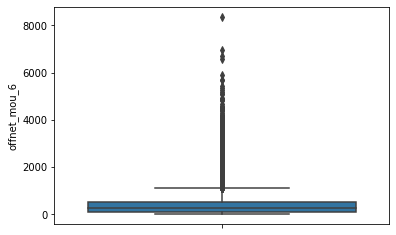

offnet_mou_7


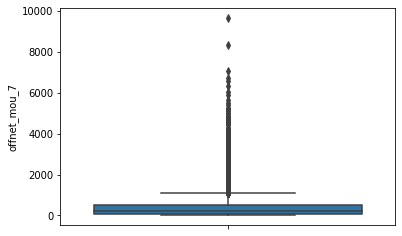

offnet_mou_8


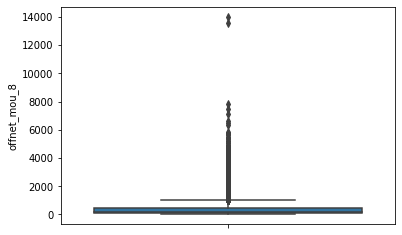

roam_ic_mou_6


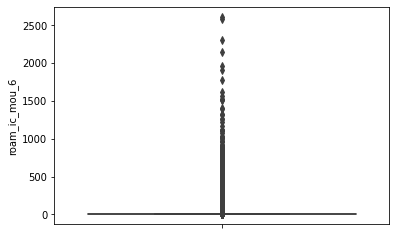

roam_ic_mou_7


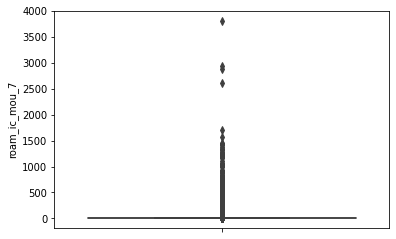

roam_ic_mou_8


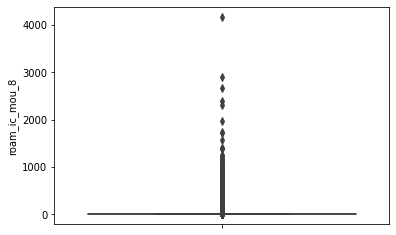

roam_og_mou_6


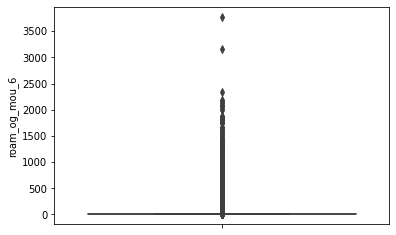

roam_og_mou_7


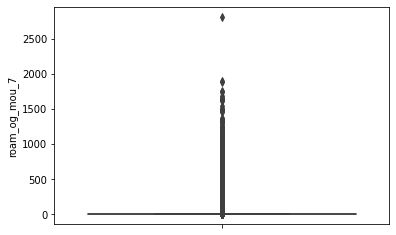

roam_og_mou_8


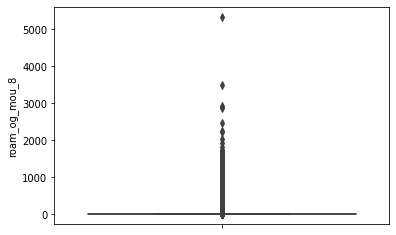

loc_og_t2t_mou_6


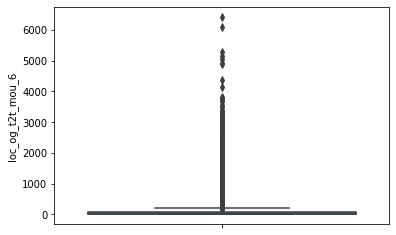

loc_og_t2t_mou_7


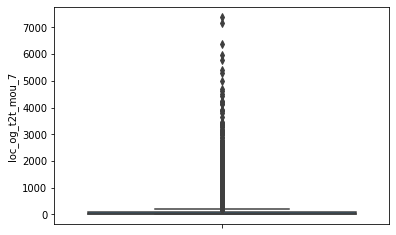

loc_og_t2t_mou_8


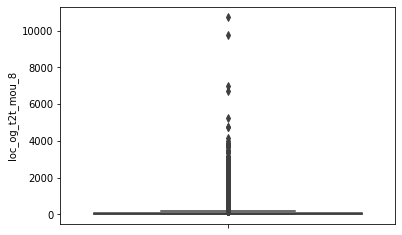

loc_og_t2m_mou_6


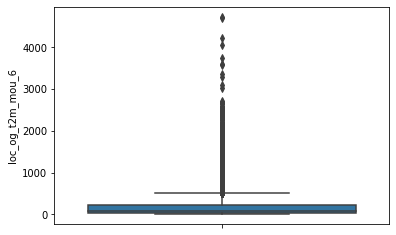

loc_og_t2m_mou_7


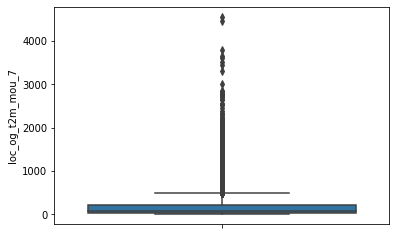

loc_og_t2m_mou_8


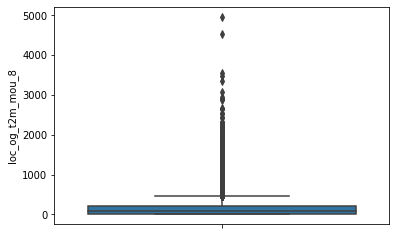

loc_og_t2f_mou_6


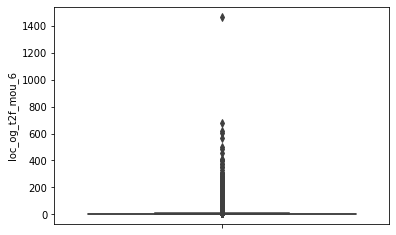

loc_og_t2f_mou_7


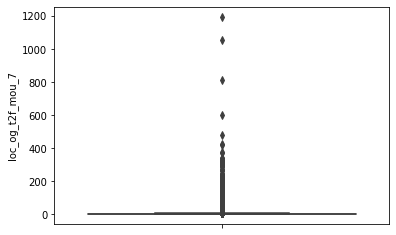

loc_og_t2f_mou_8


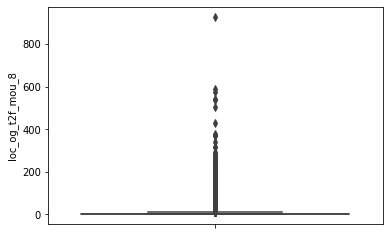

loc_og_t2c_mou_6


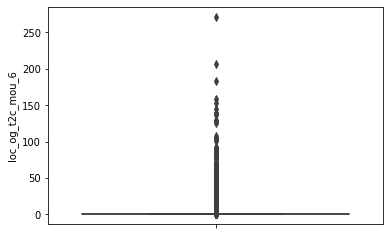

loc_og_t2c_mou_7


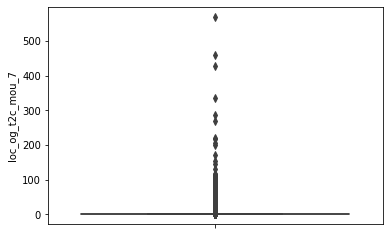

loc_og_t2c_mou_8


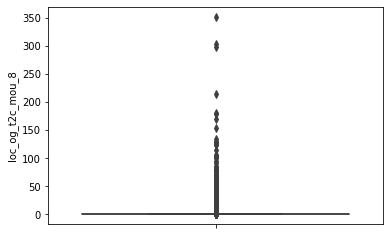

loc_og_mou_6


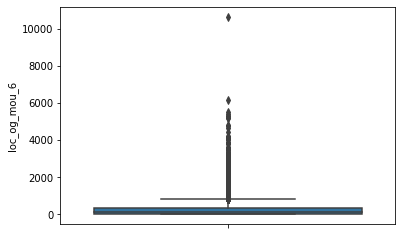

loc_og_mou_7


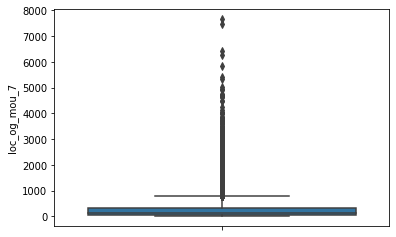

loc_og_mou_8


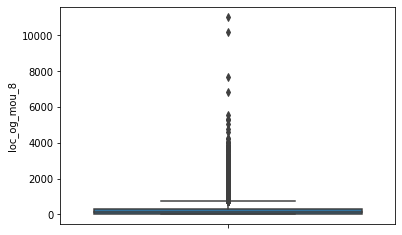

std_og_t2t_mou_6


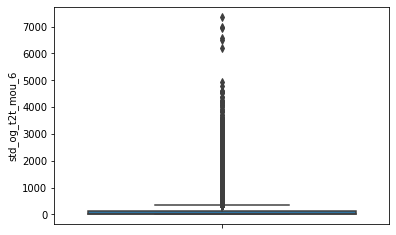

std_og_t2t_mou_7


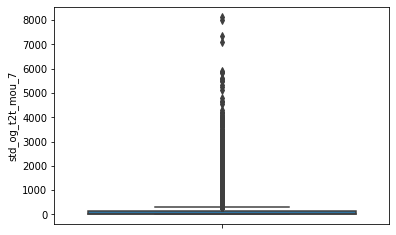

std_og_t2t_mou_8


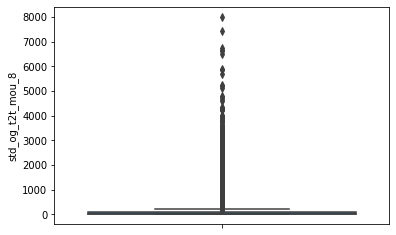

std_og_t2m_mou_6


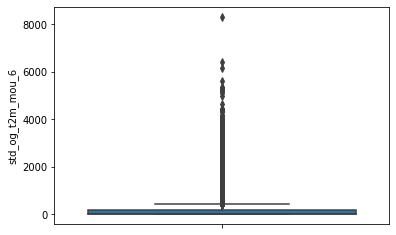

std_og_t2m_mou_7


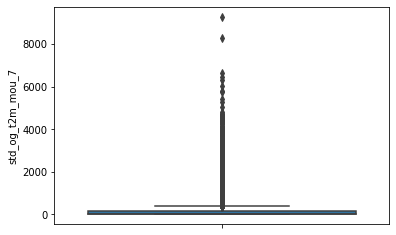

std_og_t2m_mou_8


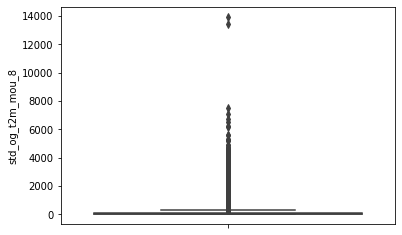

std_og_t2f_mou_6


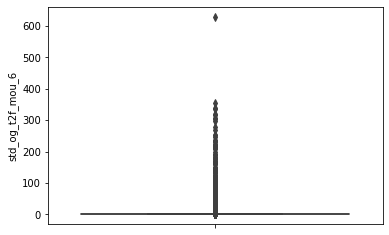

std_og_t2f_mou_7


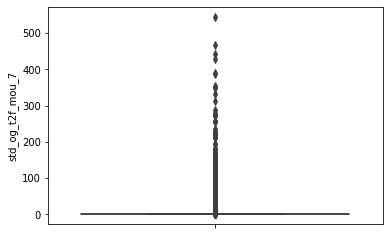

std_og_t2f_mou_8


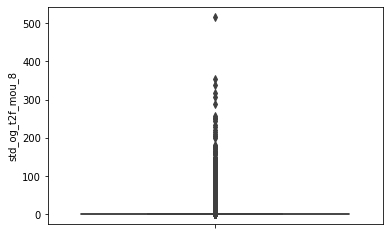

std_og_t2c_mou_6


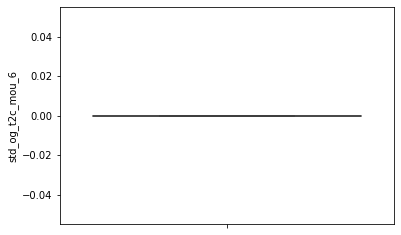

std_og_t2c_mou_7


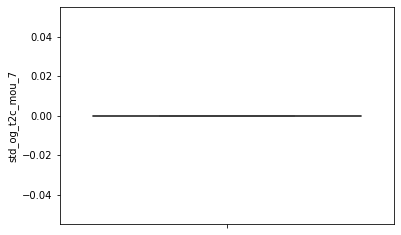

std_og_t2c_mou_8


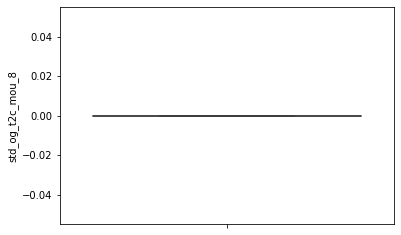

std_og_mou_6


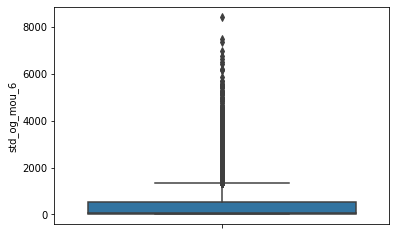

std_og_mou_7


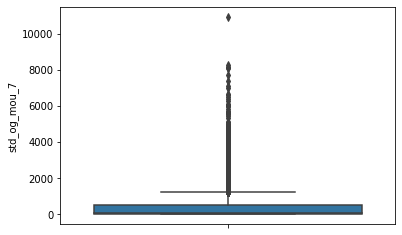

std_og_mou_8


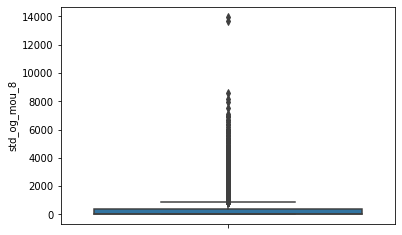

isd_og_mou_6


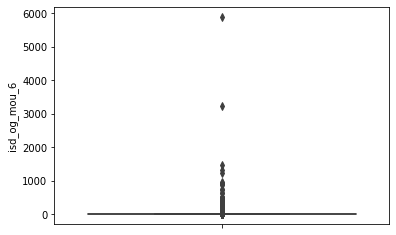

isd_og_mou_7


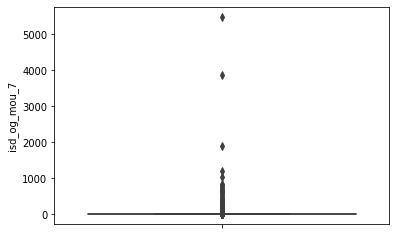

isd_og_mou_8


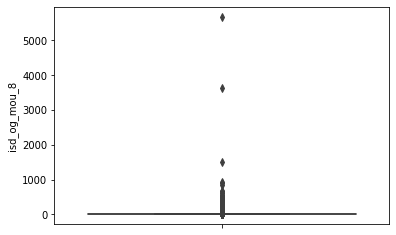

spl_og_mou_6


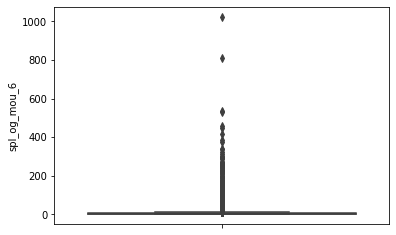

spl_og_mou_7


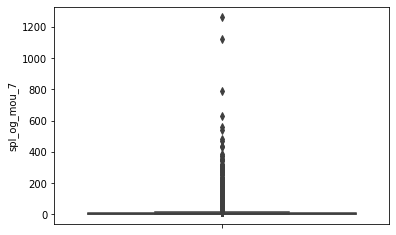

spl_og_mou_8


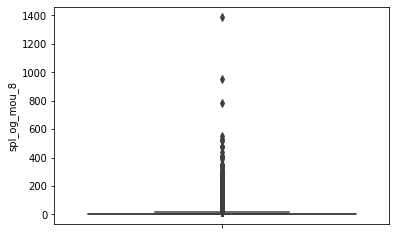

og_others_6


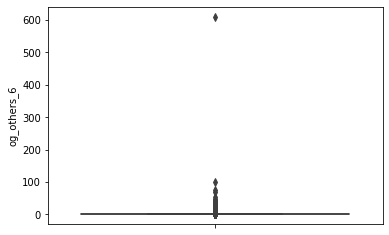

og_others_7


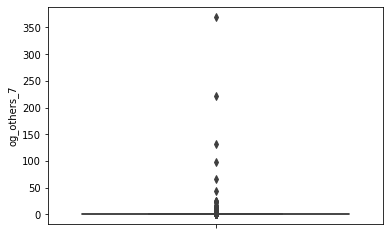

og_others_8


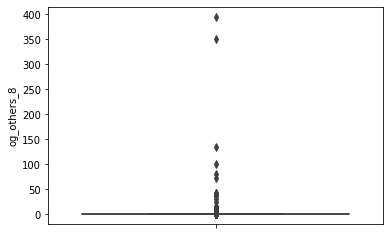

total_og_mou_6


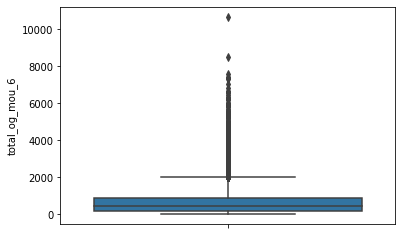

total_og_mou_7


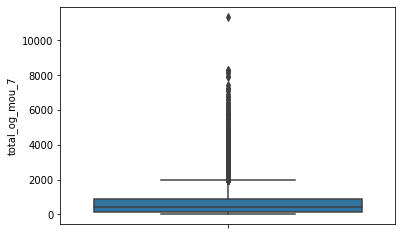

total_og_mou_8


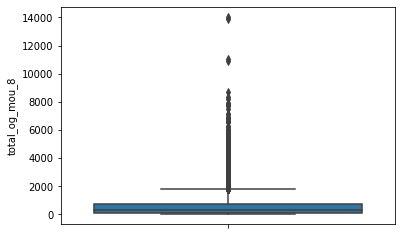

loc_ic_t2t_mou_6


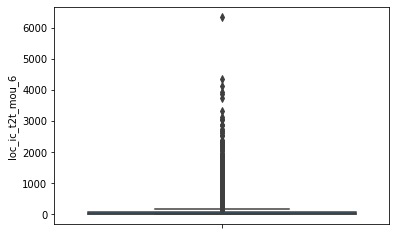

loc_ic_t2t_mou_7


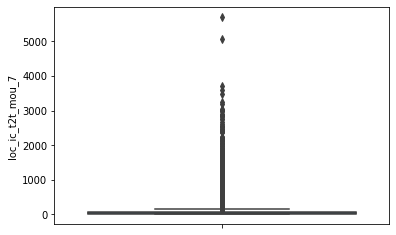

loc_ic_t2t_mou_8


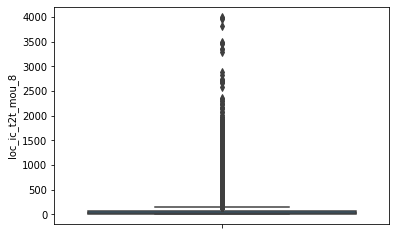

loc_ic_t2m_mou_6


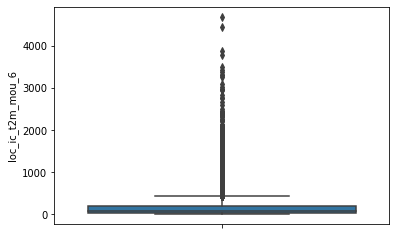

loc_ic_t2m_mou_7


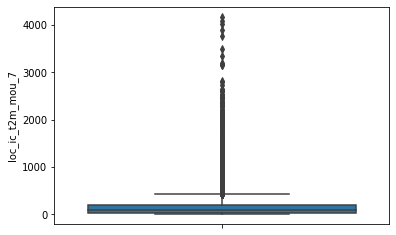

loc_ic_t2m_mou_8


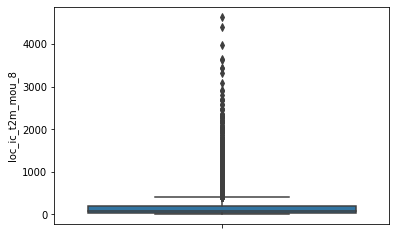

loc_ic_t2f_mou_6


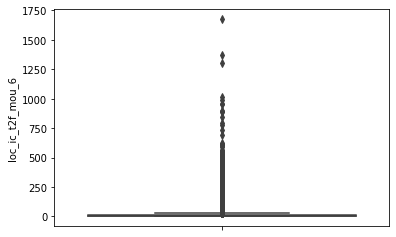

loc_ic_t2f_mou_7


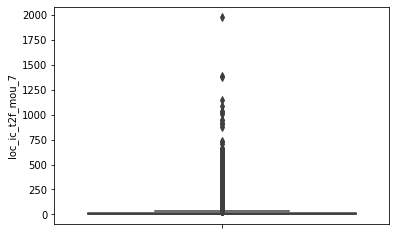

loc_ic_t2f_mou_8


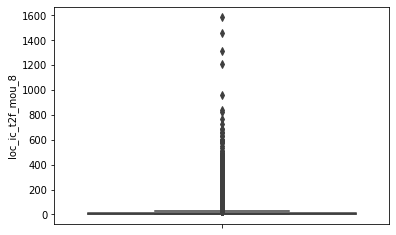

loc_ic_mou_6


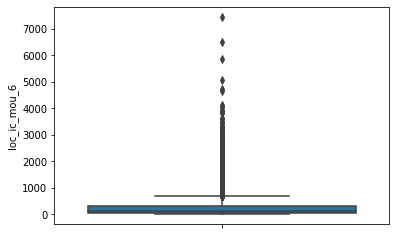

loc_ic_mou_7


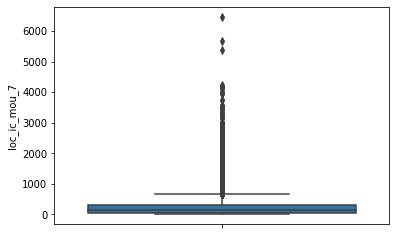

loc_ic_mou_8


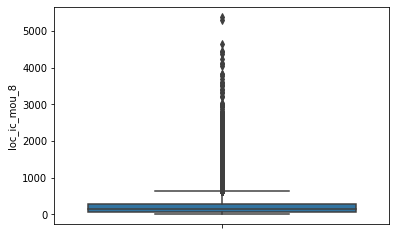

std_ic_t2t_mou_6


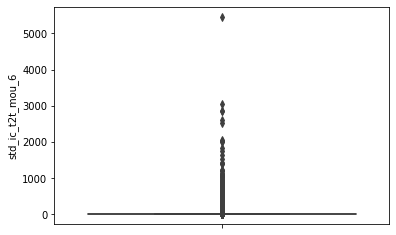

std_ic_t2t_mou_7


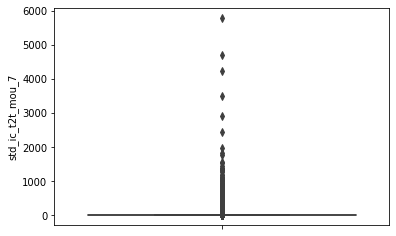

std_ic_t2t_mou_8


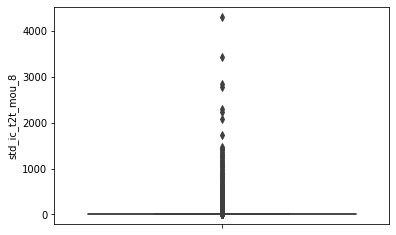

std_ic_t2m_mou_6


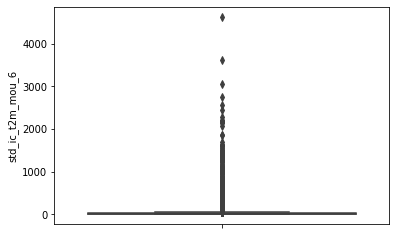

std_ic_t2m_mou_7


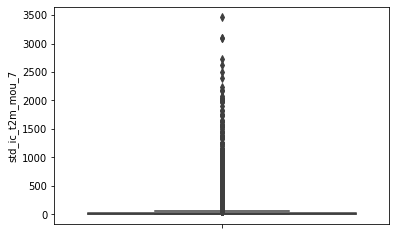

std_ic_t2m_mou_8


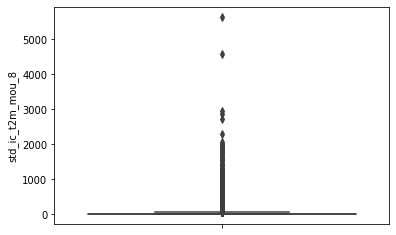

std_ic_t2f_mou_6


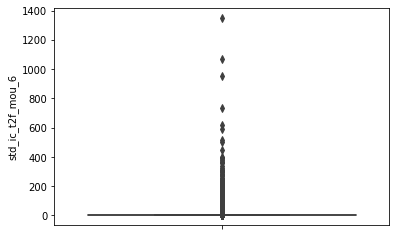

std_ic_t2f_mou_7


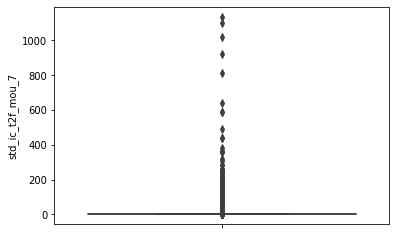

std_ic_t2f_mou_8


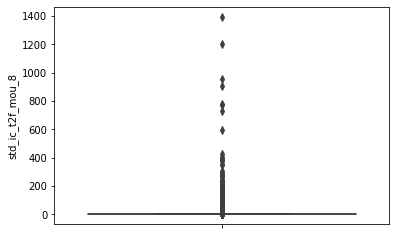

std_ic_t2o_mou_6


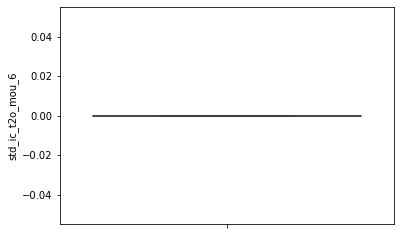

std_ic_t2o_mou_7


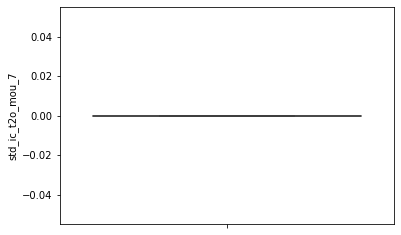

std_ic_t2o_mou_8


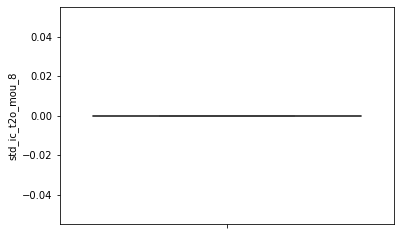

std_ic_mou_6


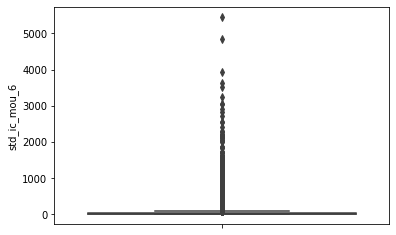

std_ic_mou_7


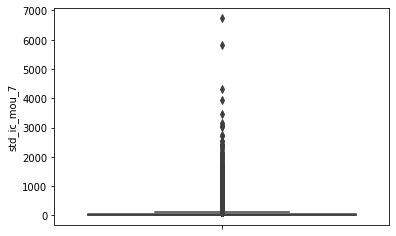

std_ic_mou_8


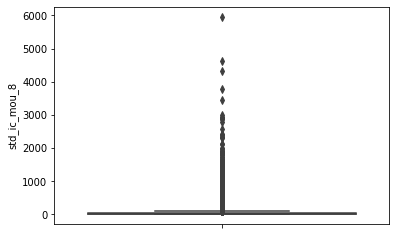

total_ic_mou_6


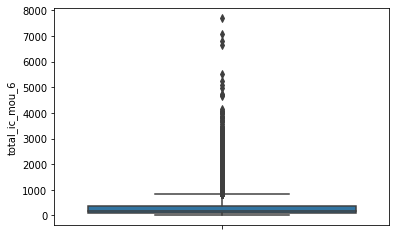

total_ic_mou_7


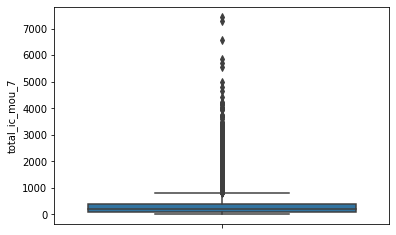

total_ic_mou_8


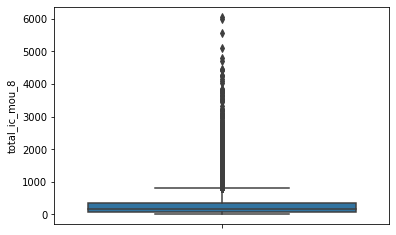

spl_ic_mou_6


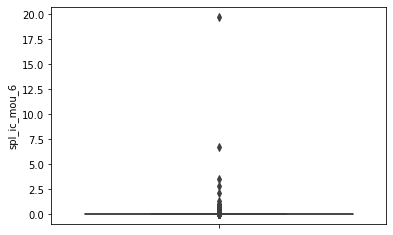

spl_ic_mou_7


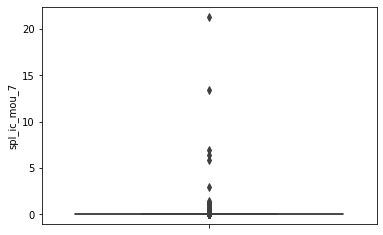

spl_ic_mou_8


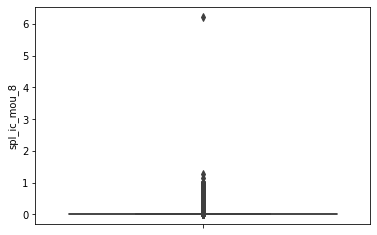

isd_ic_mou_6


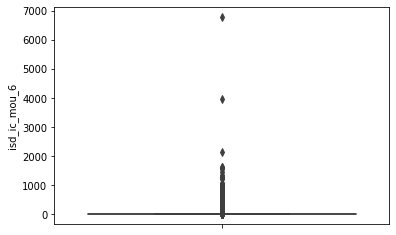

isd_ic_mou_7


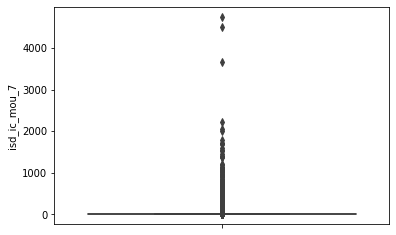

isd_ic_mou_8


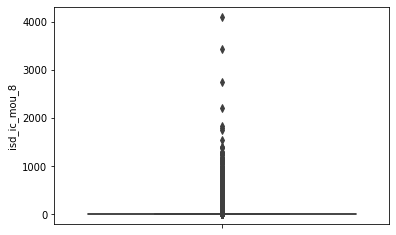

ic_others_6


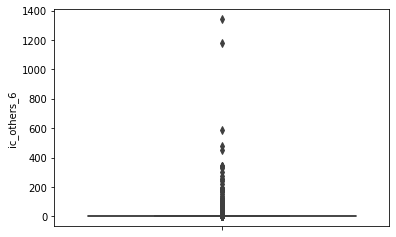

ic_others_7


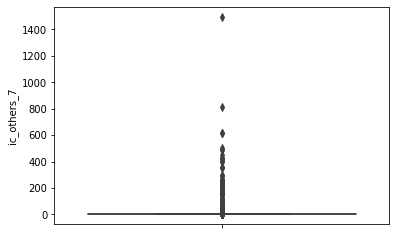

ic_others_8


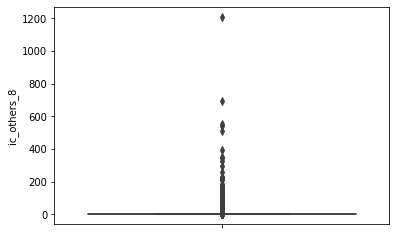

last_day_rch_amt_6


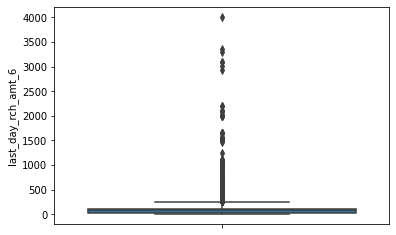

last_day_rch_amt_7


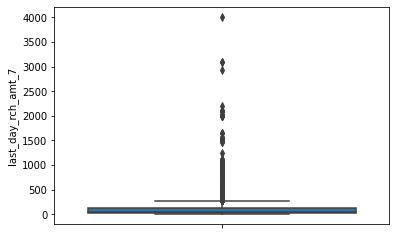

last_day_rch_amt_8


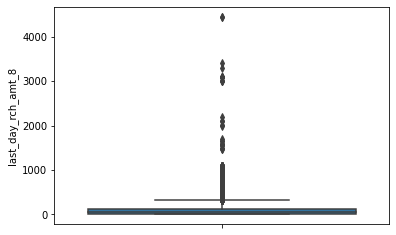

vol_2g_mb_6


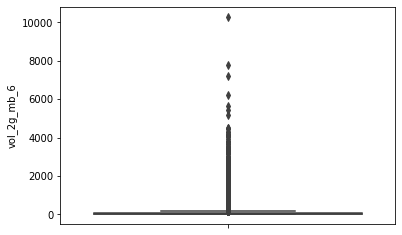

vol_2g_mb_7


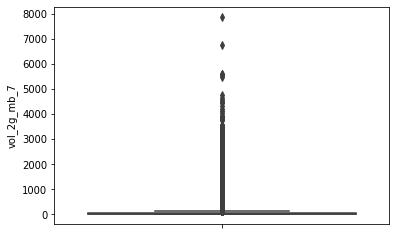

vol_2g_mb_8


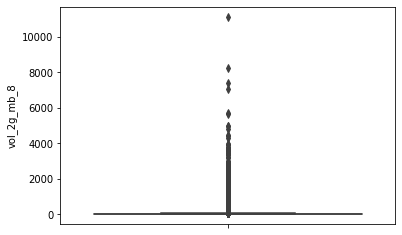

vol_3g_mb_6


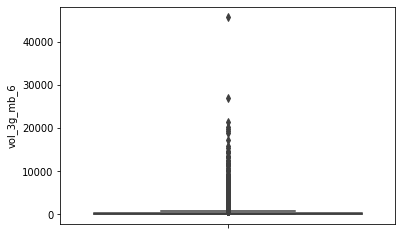

vol_3g_mb_7


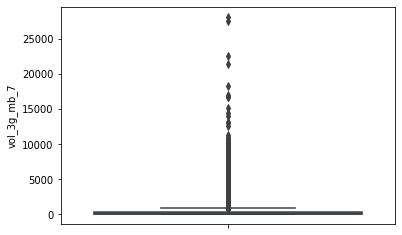

vol_3g_mb_8


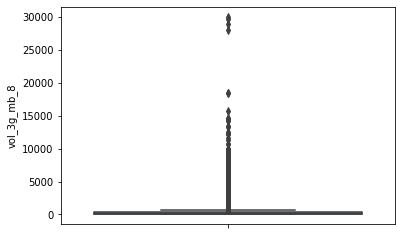

monthly_2g_6


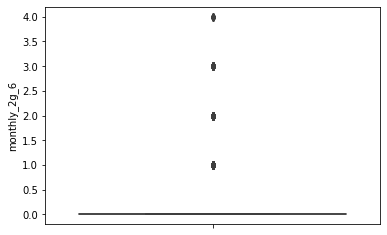

monthly_2g_7


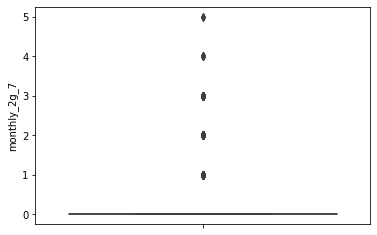

monthly_2g_8


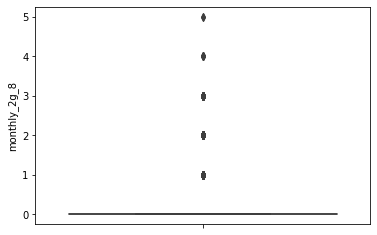

sachet_2g_6


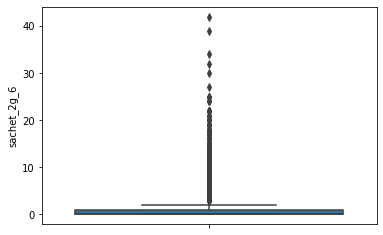

sachet_2g_7


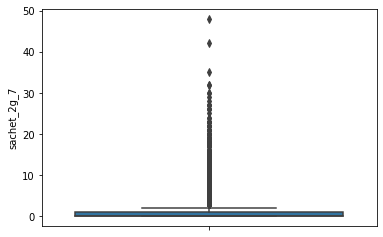

sachet_2g_8


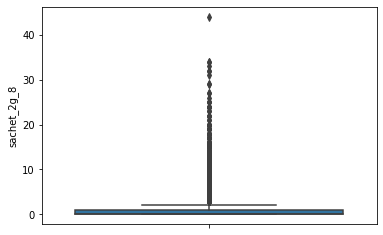

monthly_3g_6


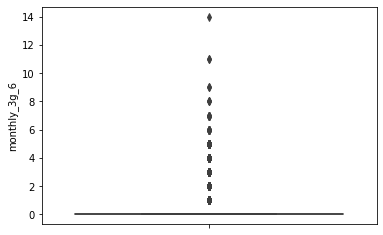

monthly_3g_7


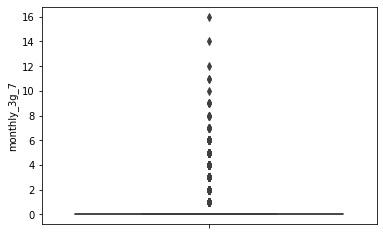

monthly_3g_8


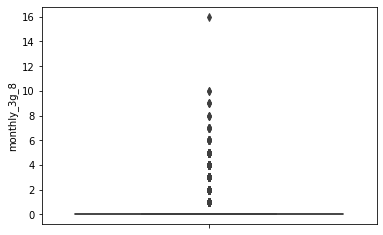

sachet_3g_6


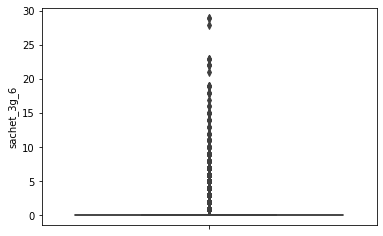

sachet_3g_7


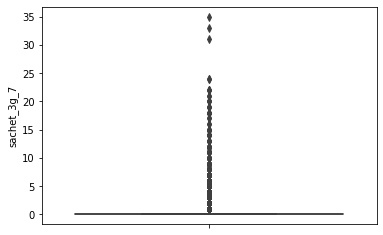

sachet_3g_8


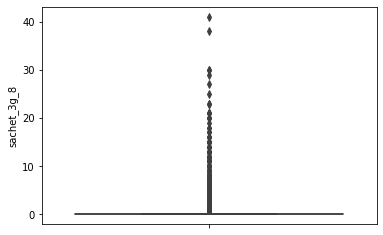

aon


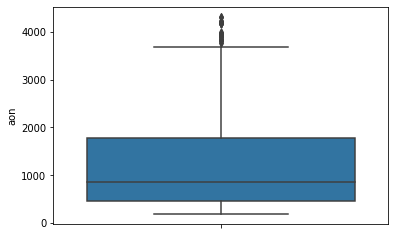

aug_vbc_3g


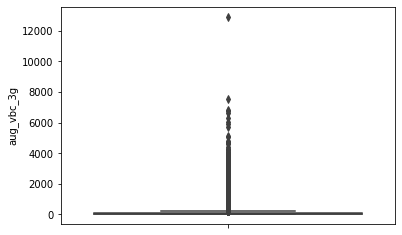

jul_vbc_3g


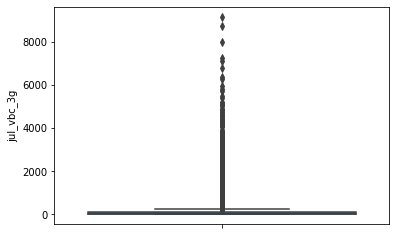

jun_vbc_3g


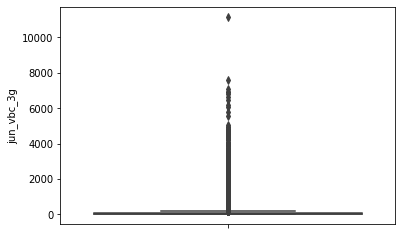

sep_vbc_3g


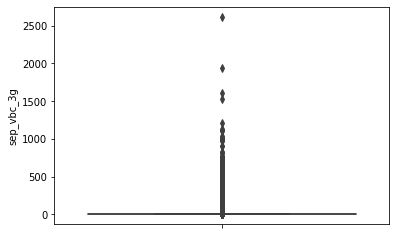

highvalcust


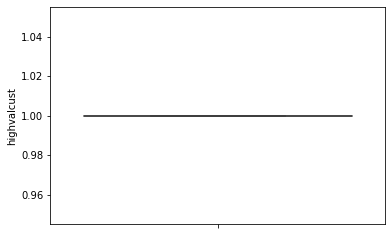

In [1143]:
for column in df.select_dtypes(exclude=['object']).columns.to_list():
    print(column)
    sns.boxplot(y=column,data=df)
    plt.show()

As per the above box plot analysis, below columns can be dropped: (They contain same value in all rows)
1. circle_id
2. loc_og_t2o_mou
3. std_og_t2o_mou
4. loc_ic_t2o_mou
5. highvalcust
6. 'std_og_t2c_mou_6'
7. 'std_ic_t2o_mou_6'
8. 'std_og_t2c_mou_7'
9. 'std_ic_t2o_mou_7'
10. 'std_og_t2c_mou_8'
11. 'std_ic_t2o_mou_8'

In [1144]:
df = df.drop(['circle_id','loc_og_t2o_mou','std_og_t2o_mou','loc_ic_t2o_mou','highvalcust'],axis=1)

In [1145]:
zero_col = ['std_og_t2c_mou_6','std_ic_t2o_mou_6','std_og_t2c_mou_7','std_ic_t2o_mou_7','std_og_t2c_mou_8','std_ic_t2o_mou_8']

In [1146]:
df = df.drop(zero_col,axis=1)

**Combining all the columns of 6 & 7 into new columns for the good phase having avg values.**

In [1147]:
for  column in df.select_dtypes(exclude=['object']).columns.to_list():
    if '_6' in column:
        print(column)
        print(df[column].value_counts())
        print()

onnet_mou_6
0.00       1655
102.31      396
0.26         17
0.33         16
1.01         16
           ... 
405.89        1
1671.08       1
639.59        1
102.94        1
2414.04       1
Name: onnet_mou_6, Length: 17585, dtype: int64

offnet_mou_6
0.000       698
253.385     396
0.610        11
2.080         8
0.080         8
           ... 
0.060         1
3517.140      1
2411.160      1
1146.730      1
375.040       1
Name: offnet_mou_6, Length: 21760, dtype: int64

roam_ic_mou_6
0.00      23500
0.86         13
1.01         13
0.53         12
0.30         12
          ...  
47.84         1
12.85         1
35.53         1
166.43        1
22.64         1
Name: roam_ic_mou_6, Length: 4127, dtype: int64

roam_og_mou_6
0.00      23474
0.21         13
0.60         10
0.36          9
1.01          9
          ...  
39.59         1
150.79        1
473.11        1
362.89        1
68.46         1
Name: roam_og_mou_6, Length: 4879, dtype: int64

loc_og_t2t_mou_6
0.00      2829
28.12      396
0

In [1148]:
for  column in df.select_dtypes(exclude=['object']).columns.to_list():
    if '_6' in column:
        column = column.replace('_6','')
        df['{}_good'.format(column)] = (df['{}_6'.format(column)] + df['{}_7'.format(column)])/2
        df = df.drop(['{}_6'.format(column),'{}_7'.format(column)],axis=1)

In [1149]:
df['VBC_good'] = (df['jul_vbc_3g']+ df['jun_vbc_3g'])/2
df = df.drop(['sep_vbc_3g','jul_vbc_3g','jun_vbc_3g'],axis=1)
df = df.rename(columns={'aug_vbc_3g':'VBC_8'})

In [1150]:
df.shape

(29976, 78)

In [1151]:
df.columns

Index(['onnet_mou_8', 'offnet_mou_8', 'roam_ic_mou_8', 'roam_og_mou_8',
       'loc_og_t2t_mou_8', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_8',
       'loc_og_t2c_mou_8', 'loc_og_mou_8', 'std_og_t2t_mou_8',
       'std_og_t2m_mou_8', 'std_og_t2f_mou_8', 'std_og_mou_8', 'isd_og_mou_8',
       'spl_og_mou_8', 'og_others_8', 'total_og_mou_8', 'loc_ic_t2t_mou_8',
       'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_8', 'loc_ic_mou_8',
       'std_ic_t2t_mou_8', 'std_ic_t2m_mou_8', 'std_ic_t2f_mou_8',
       'std_ic_mou_8', 'total_ic_mou_8', 'spl_ic_mou_8', 'isd_ic_mou_8',
       'ic_others_8', 'last_day_rch_amt_8', 'vol_2g_mb_8', 'vol_3g_mb_8',
       'monthly_2g_8', 'sachet_2g_8', 'monthly_3g_8', 'sachet_3g_8',
       'fb_user_action', 'aon', 'VBC_8', 'churn', 'fb_user_good',
       'onnet_mou_good', 'offnet_mou_good', 'roam_ic_mou_good',
       'roam_og_mou_good', 'loc_og_t2t_mou_good', 'loc_og_t2m_mou_good',
       'loc_og_t2f_mou_good', 'loc_og_t2c_mou_good', 'loc_og_mou_good',
       'std_og_t2t_mou

In [1152]:
df.shape

(29976, 78)

**Outlier Treatment** <br>


In [1153]:
categorical_columns=df.select_dtypes(include=['object']).columns.to_list()
continous_columns=df.select_dtypes(exclude=['object']).columns.to_list()

In [1154]:
df.shape

(29976, 78)

aon
3651.0

3651    471
2372    190
495     114
494      90
492      73
       ... 
3464      1
3492      1
3643      1
1852      1
1877      1
Name: aon, Length: 3287, dtype: int64


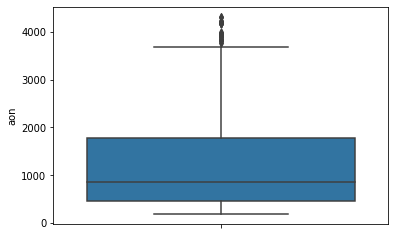

onnet_mou_good
2046.76375

0.000      949
96.990     235
45.835      80
51.155      70
0.125       13
          ... 
78.925       1
74.835       1
142.675      1
220.235      1
46.035       1
Name: onnet_mou_good, Length: 24159, dtype: int64


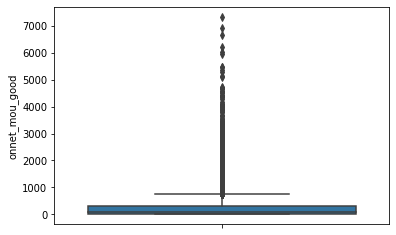

offnet_mou_good
2145.94375

0.0000       331
242.8350     235
116.1425      50
126.6925      34
0.0500         6
            ... 
229.4150       1
1925.7950      1
491.9900       1
534.0400       1
260.2750       1
Name: offnet_mou_good, Length: 27042, dtype: int64


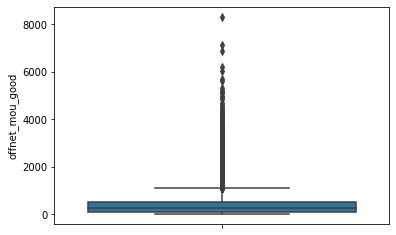

roam_ic_mou_good
279.645

0.000      21069
0.505         25
0.630         15
0.605         14
0.300         12
           ...  
151.160        1
107.920        1
402.145        1
53.115         1
2.500          1
Name: roam_ic_mou_good, Length: 5809, dtype: int64


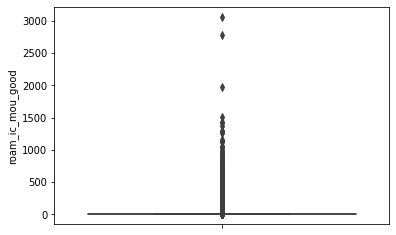

roam_og_mou_good
438.87375

0.000      20991
0.105         11
0.505         11
0.180         10
0.365         10
           ...  
22.230         1
73.970         1
55.670         1
134.270        1
38.795         1
Name: roam_og_mou_good, Length: 6792, dtype: int64


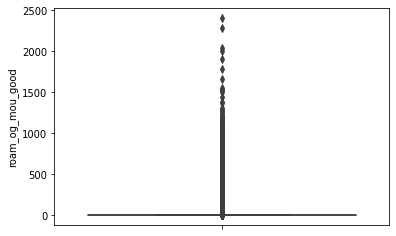

loc_og_t2t_mou_good
995.8975

0.000      1487
27.350      235
13.290       99
14.060       85
0.215        19
           ... 
24.790        1
13.315        1
109.525       1
21.660        1
46.035        1
Name: loc_og_t2t_mou_good, Length: 18559, dtype: int64


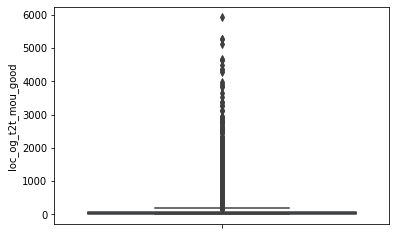

loc_og_t2m_mou_good
1097.6975

0.000      837
85.180     235
41.950      78
43.230      57
0.115        8
          ... 
54.295       1
547.000      1
685.945      1
12.775       1
299.850      1
Name: loc_og_t2m_mou_good, Length: 23684, dtype: int64


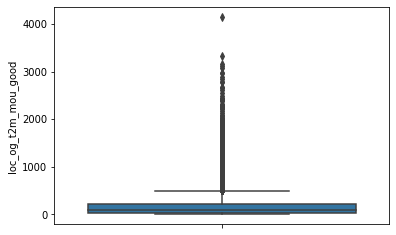

loc_og_t2f_mou_good
86.4025

0.000      10842
0.105        373
0.210        235
0.140         66
0.190         65
           ...  
60.020         1
0.445          1
140.070        1
23.170         1
38.810         1
Name: loc_og_t2f_mou_good, Length: 6328, dtype: int64


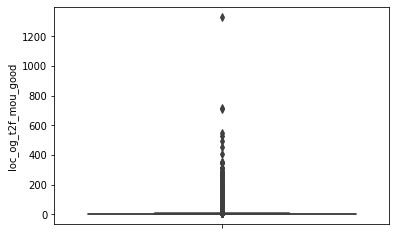

loc_og_t2c_mou_good
22.11375

0.000     18260
0.005        82
0.015        78
0.040        70
0.180        63
          ...  
13.870        1
18.715        1
7.930         1
3.435         1
16.920        1
Name: loc_og_t2c_mou_good, Length: 3124, dtype: int64


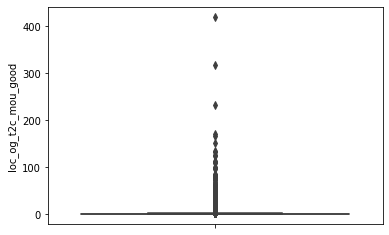

loc_og_mou_good
1678.3275

0.0000      740
138.7900    235
68.4475      75
70.3425      57
0.1250        6
           ... 
14.7950       1
101.0150      1
129.9750      1
236.3000      1
189.1000      1
Name: loc_og_mou_good, Length: 25428, dtype: int64


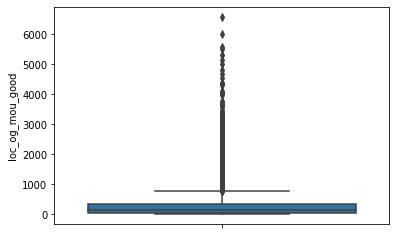

std_og_t2t_mou_good
1761.275

0.0000      9805
4.9325       235
2.1525       163
2.7800       117
0.1650        31
            ... 
25.5250        1
11.5450        1
157.7350       1
224.1750       1
11.7900        1
Name: std_og_t2t_mou_good, Length: 15280, dtype: int64


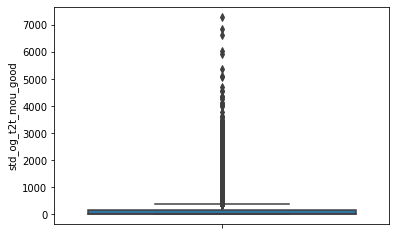

std_og_t2m_mou_good
1851.1124999999997

0.000       5443
21.835       236
10.040       133
11.795        99
0.230         26
            ... 
65.300         1
220.945        1
726.470        1
16.485         1
1695.875       1
Name: std_og_t2m_mou_good, Length: 18134, dtype: int64


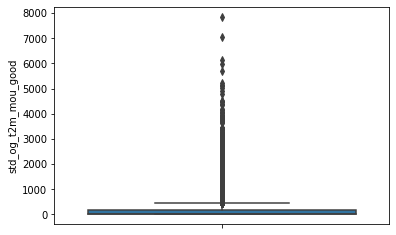

std_og_t2f_mou_good
39.10875

0.000     23321
0.200        36
0.130        34
0.255        33
0.090        32
          ...  
6.615         1
9.830         1
8.770         1
7.955         1
13.505        1
Name: std_og_t2f_mou_good, Length: 2640, dtype: int64


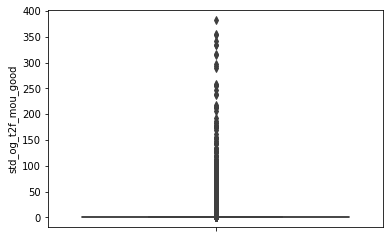

std_og_mou_good
2585.3599999999997

0.0000      4046
64.0925      235
29.0200      112
35.0725       89
0.2300        27
            ... 
294.8950       1
102.6600       1
683.1000       1
175.6550       1
381.9100       1
Name: std_og_mou_good, Length: 20770, dtype: int64


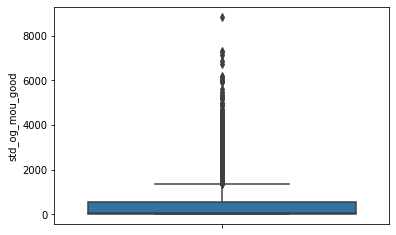

isd_og_mou_good
42.017500000000005

0.000      26408
0.005         71
0.505         64
0.015         50
0.125         44
           ...  
198.320        1
6.195          1
229.200        1
24.220         1
20.200         1
Name: isd_og_mou_good, Length: 1560, dtype: int64


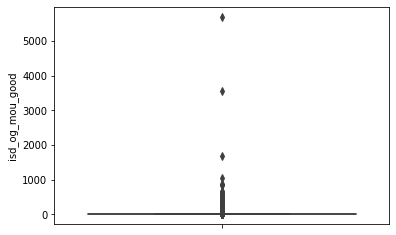

spl_og_mou_good
63.03875000000001

0.000     8390
0.560      236
0.380      191
0.180      145
0.005      102
          ... 
13.290       1
25.190       1
17.740       1
19.770       1
6.005        1
Name: spl_og_mou_good, Length: 6685, dtype: int64


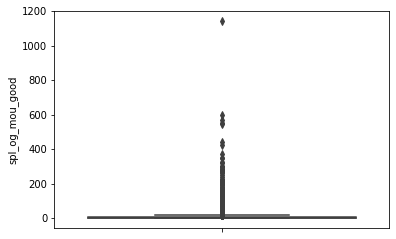

og_others_good
4.7225

0.000     22853
0.105       147
0.215        62
0.325        52
0.100        52
          ...  
2.970         1
12.165        1
5.370         1
37.105        1
3.155         1
Name: og_others_good, Length: 895, dtype: int64


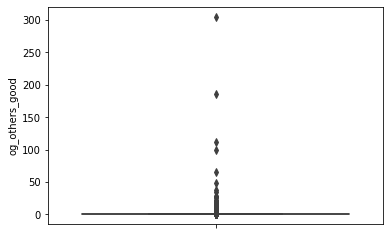

total_og_mou_good
2960.4875

0.000      753
0.105       11
1.580        5
0.980        5
0.505        5
          ... 
56.800       1
150.690      1
39.925       1
459.285      1
548.370      1
Name: total_og_mou_good, Length: 27807, dtype: int64


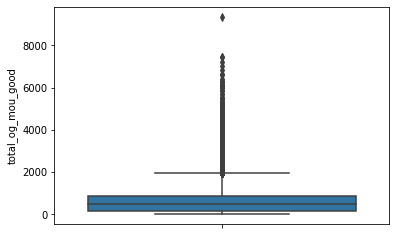

loc_ic_t2t_mou_good
620.12

0.000     831
27.205    235
13.530     85
13.675     66
0.895      15
         ... 
35.480      1
27.895      1
77.350      1
32.565      1
44.115      1
Name: loc_ic_t2t_mou_good, Length: 18284, dtype: int64


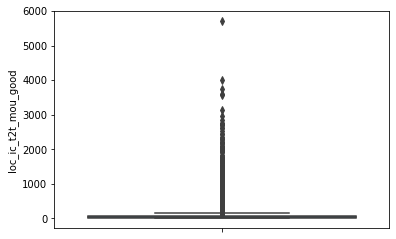

loc_ic_t2m_mou_good
977.09

0.0000      319
89.6175     235
44.7625      53
44.8550      48
4.5100        6
           ... 
456.9950      1
71.3100       1
219.7700      1
667.8700      1
13.7500       1
Name: loc_ic_t2m_mou_good, Length: 24087, dtype: int64


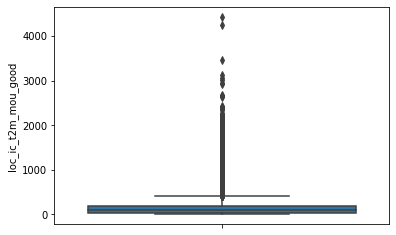

loc_ic_t2f_mou_good
189.375

0.000      6021
2.110       236
1.080       175
1.030       127
0.180        64
           ... 
300.075       1
67.960        1
37.150        1
107.080       1
48.020        1
Name: loc_ic_t2f_mou_good, Length: 9374, dtype: int64


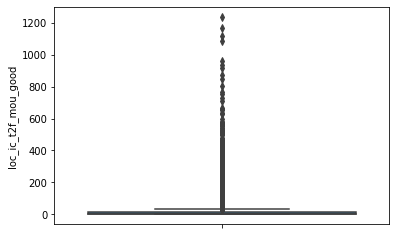

loc_ic_mou_good
1427.4175000000002

0.0000      249
143.2275    235
71.4025      44
71.8250      34
57.8100       5
           ... 
173.4300      1
68.2300       1
133.9850      1
34.1350       1
787.8700      1
Name: loc_ic_mou_good, Length: 25772, dtype: int64


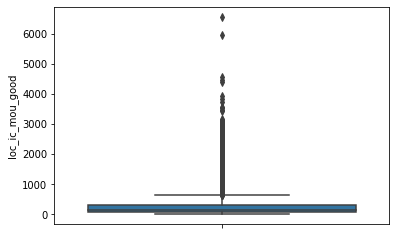

std_ic_t2t_mou_good
200.55375

0.000     9313
0.645      242
0.305      190
0.340      148
0.015       77
          ... 
37.480       1
7.685        1
26.775       1
13.785       1
28.370       1
Name: std_ic_t2t_mou_good, Length: 8581, dtype: int64


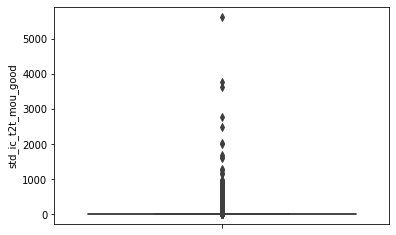

std_ic_t2m_mou_good
373.11125

0.000      4314
5.875       241
2.870       133
3.005       107
0.215        44
           ... 
8.450         1
17.740        1
11.235        1
135.140       1
11.360        1
Name: std_ic_t2m_mou_good, Length: 12395, dtype: int64


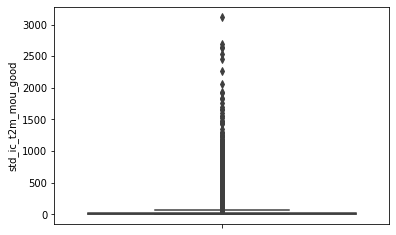

std_ic_t2f_mou_good
46.75

0.000     19058
0.240        73
0.215        67
0.100        64
0.230        63
          ...  
7.870         1
3.015         1
10.695        1
21.110        1
3.385         1
Name: std_ic_t2f_mou_good, Length: 3599, dtype: int64


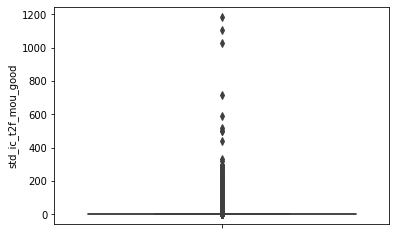

std_ic_mou_good
545.23875

0.000      2413
13.170      236
6.570       109
6.600        91
0.130        34
           ... 
100.410       1
26.905        1
778.890       1
20.840        1
32.415        1
Name: std_ic_mou_good, Length: 15274, dtype: int64


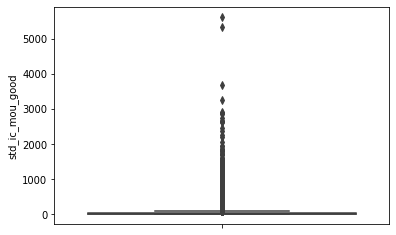

total_ic_mou_good
1684.7675

0.000       483
0.615         6
76.985        6
86.410        5
143.085       4
           ... 
69.620        1
427.480       1
1630.740      1
111.975       1
772.775       1
Name: total_ic_mou_good, Length: 26370, dtype: int64


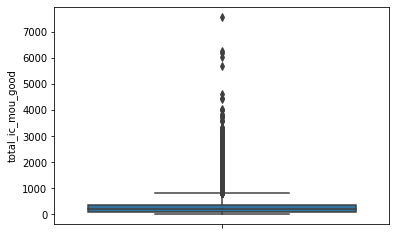

spl_ic_mou_good
0.405

0.000    22612
0.075      620
0.065      293
0.030      276
0.100      251
         ...  
0.635        1
1.480        1
0.525        1
0.545        1
0.425        1
Name: spl_ic_mou_good, Length: 207, dtype: int64


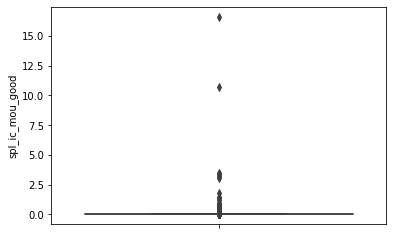

isd_ic_mou_good
227.12

0.000      20609
0.005        159
0.015         94
0.025         83
0.230         61
           ...  
246.780        1
249.995        1
42.560         1
24.780         1
10.505         1
Name: isd_ic_mou_good, Length: 5045, dtype: int64


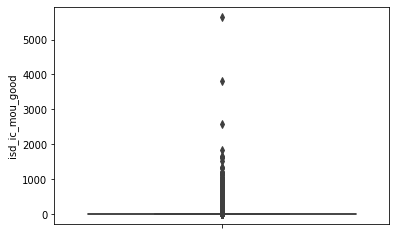

ic_others_good
19.74625

0.000     19223
0.030       193
0.040       192
0.240       180
0.025       179
          ...  
2.315         1
2.445         1
5.830         1
68.630        1
5.000         1
Name: ic_others_good, Length: 2432, dtype: int64


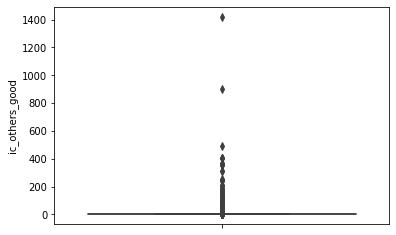

last_day_rch_amt_good
550.0

110.0    1547
0.0      1431
25.0     1278
120.0    1204
55.0     1180
         ... 
547.0       1
341.5       1
263.5       1
204.5       1
515.5       1
Name: last_day_rch_amt_good, Length: 735, dtype: int64


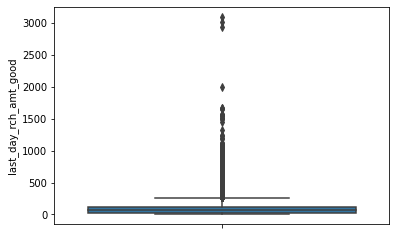

vol_2g_mb_good
1360.9025000000001

0.000      13500
0.005         66
0.010         45
0.020         33
0.015         30
           ...  
83.460         1
575.135        1
213.220        1
199.395        1
27.895         1
Name: vol_2g_mb_good, Length: 13783, dtype: int64


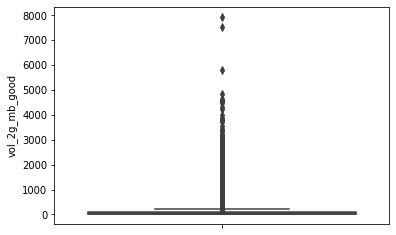

vol_3g_mb_good
3452.82

0.000       17938
0.005          21
0.010           7
0.030           6
0.015           6
            ...  
1577.935        1
819.755         1
674.270         1
666.855         1
440.300         1
Name: vol_3g_mb_good, Length: 11754, dtype: int64


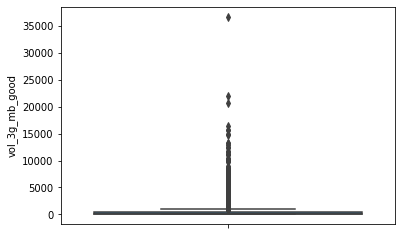

monthly_2g_good
1.5

0.0    24036
0.5     2866
1.0     2215
1.5      745
2.0       89
2.5       17
3.0        6
3.5        1
4.5        1
Name: monthly_2g_good, dtype: int64


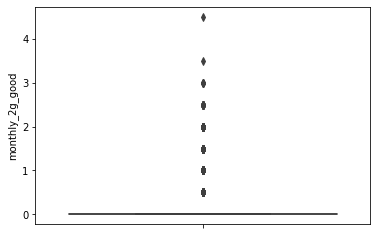

sachet_2g_good
11.0

0.0     19364
0.5      2565
1.0      1593
1.5       951
2.0       750
2.5       567
3.0       514
3.5       468
4.0       441
4.5       382
5.0       367
5.5       287
6.0       267
6.5       194
7.0       179
7.5       136
8.0       134
8.5       116
9.0       115
10.0       87
9.5        82
10.5       70
11.0       59
11.5       49
12.0       40
12.5       38
13.0       33
13.5       17
14.5       16
14.0       15
16.5       11
16.0       11
15.0        8
15.5        7
17.5        7
17.0        5
18.0        4
20.5        3
19.0        3
21.0        3
29.5        2
22.0        2
22.5        2
37.0        1
23.0        1
20.0        1
24.0        1
36.5        1
24.5        1
27.0        1
19.5        1
18.5        1
28.0        1
25.5        1
38.0        1
Name: sachet_2g_good, dtype: int64


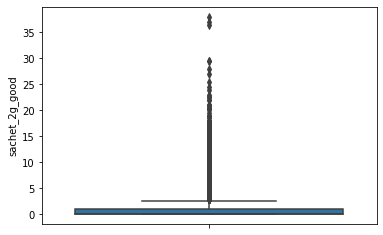

monthly_3g_good
2.5

0.0     24157
0.5      2437
1.0      1723
1.5       934
2.0       338
2.5       148
3.0       102
3.5        44
4.0        25
4.5        21
5.0        14
6.0        10
5.5         8
6.5         4
8.0         3
7.0         3
9.0         2
9.5         1
10.0        1
11.5        1
Name: monthly_3g_good, dtype: int64


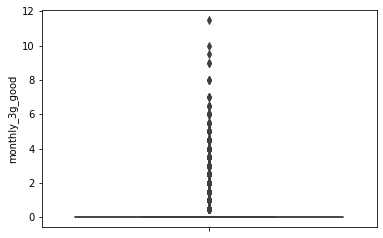

sachet_3g_good
4.0

0.0     25383
0.5      2403
1.0       958
1.5       435
2.0       197
2.5       127
3.0        92
3.5        63
4.0        57
4.5        47
5.0        37
6.0        21
5.5        21
7.0        16
6.5        15
8.0        14
8.5        10
9.5         9
11.0        8
7.5         8
9.0         6
10.0        6
14.5        5
12.0        5
11.5        4
10.5        3
18.5        3
15.0        3
23.5        2
12.5        2
15.5        2
13.5        2
18.0        2
13.0        2
27.0        1
21.5        1
20.5        1
25.0        1
17.0        1
25.5        1
26.5        1
19.5        1
Name: sachet_3g_good, dtype: int64


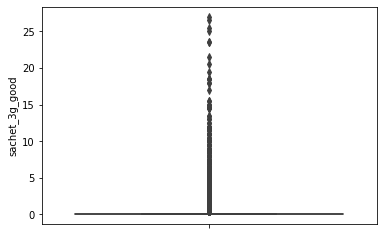

VBC_good
1822.8799999999999

0.000      18773
0.015          6
0.010          5
0.545          4
0.075          4
           ...  
560.670        1
512.780        1
19.470         1
270.160        1
637.885        1
Name: VBC_good, Length: 10805, dtype: int64


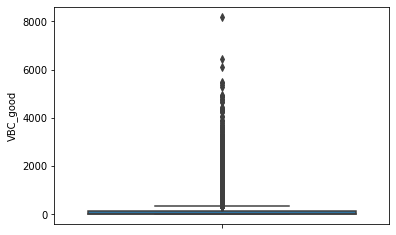

In [1155]:
continous_columns=df.select_dtypes(exclude=['object']).columns.to_list()
good = list(filter(lambda x: True if '_8' not in x else False, continous_columns))
for column in good:
    print(column)
    print(df[column].quantile(.99))
    print()
    
    print(df[column].value_counts())
    sns.boxplot(y=column,data=df)
    plt.show()

In [1156]:
df.shape

(29976, 78)

In [1157]:
#df=df.loc[df['loc_og_t2f_mou_good']<=df['loc_og_t2f_mou_good'].quantile(.99)]
#df=df.loc[df['spl_og_mou_good']<=df['loc_og_t2f_mou_good'].quantile(.99)]
#df=df.loc[df['loc_og_t2t_mou_good']<=df['loc_og_t2t_mou_good'].quantile(.99)]

In [1158]:
good.remove('monthly_2g_good')
good.remove('sachet_2g_good')
good.remove('monthly_3g_good')
good.remove('sachet_3g_good')
for column in good:
    df=df.loc[df[column]<=df[column].quantile(.995)]

In [1159]:
df.shape

(25337, 78)

aon
3651.0

3651    401
2372    161
495     102
494      78
492      63
       ... 
2183      1
3568      1
3600      1
2005      1
2073      1
Name: aon, Length: 3194, dtype: int64


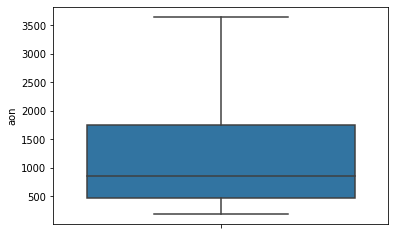

onnet_mou_good
1425.531999999999

0.000      878
96.990     213
45.835      74
51.155      63
0.125       13
          ... 
107.405      1
897.050      1
291.475      1
3.020        1
109.590      1
Name: onnet_mou_good, Length: 20568, dtype: int64


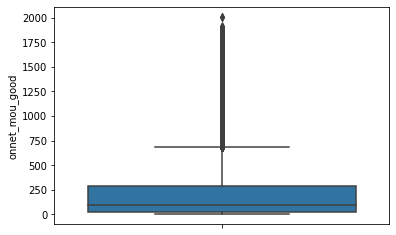

offnet_mou_good
1517.2633999999996

0.0000      307
242.8350    213
116.1425     48
126.6925     29
0.0500        6
           ... 
417.8550      1
38.9000       1
49.1200       1
208.0375      1
204.2900      1
Name: offnet_mou_good, Length: 22907, dtype: int64


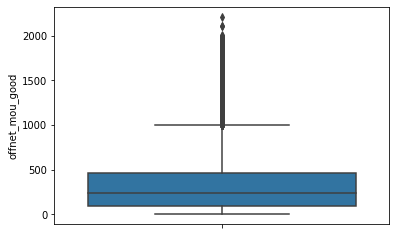

roam_ic_mou_good
185.18839999999932

0.000     17869
0.505        21
0.605        12
0.630        12
0.025        11
          ...  
18.410        1
14.195        1
38.745        1
52.930        1
12.230        1
Name: roam_ic_mou_good, Length: 4926, dtype: int64


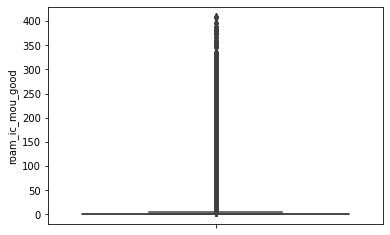

roam_og_mou_good
293.2883999999989

0.000      17805
0.105         10
0.365         10
0.440          8
1.005          8
           ...  
4.105          1
126.390        1
8.760          1
20.015         1
205.720        1
Name: roam_og_mou_good, Length: 5804, dtype: int64


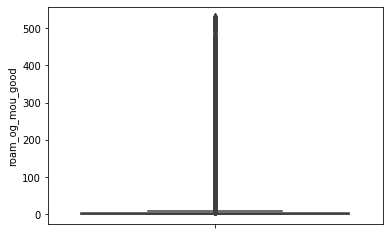

loc_og_t2t_mou_good
626.1823999999995

0.000      1291
27.350      213
13.290       91
14.060       76
0.165        17
           ... 
688.960       1
372.010       1
501.250       1
64.325        1
26.000        1
Name: loc_og_t2t_mou_good, Length: 16033, dtype: int64


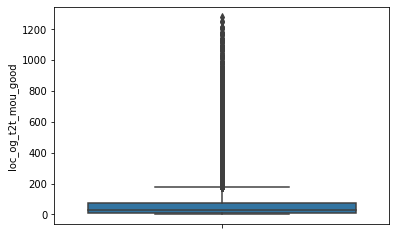

loc_og_t2m_mou_good
835.7131999999996

0.000      715
85.180     213
41.950      73
43.230      50
0.530        8
          ... 
316.915      1
285.085      1
2.435        1
37.340       1
141.370      1
Name: loc_og_t2m_mou_good, Length: 20320, dtype: int64


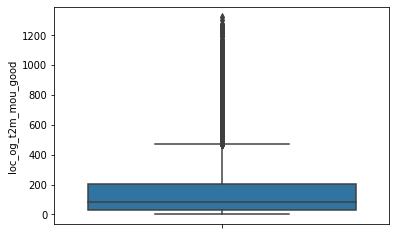

loc_og_t2f_mou_good
65.2164

0.000     9431
0.105      334
0.210      213
0.140       62
0.130       57
          ... 
55.970       1
23.450       1
27.515       1
22.245       1
2.275        1
Name: loc_og_t2f_mou_good, Length: 5438, dtype: int64


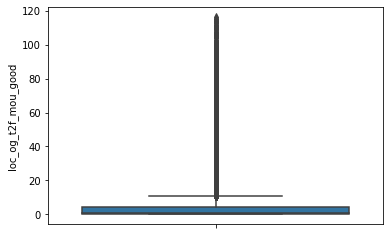

loc_og_t2c_mou_good
17.090599999999977

0.000     15693
0.005        70
0.040        65
0.015        64
0.180        55
          ...  
15.640        1
9.770         1
4.825         1
20.055        1
6.060         1
Name: loc_og_t2c_mou_good, Length: 2637, dtype: int64


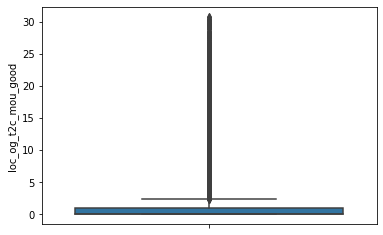

loc_og_mou_good
1114.1823999999997

0.0000      631
138.7900    213
68.4475      70
70.3425      50
0.1250        6
           ... 
443.8300      1
78.7200       1
425.3250      1
13.6050       1
71.3150       1
Name: loc_og_mou_good, Length: 21679, dtype: int64


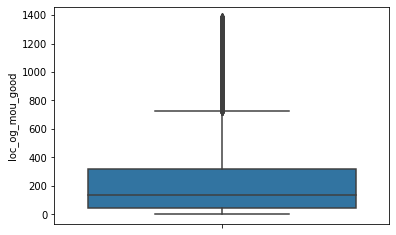

std_og_t2t_mou_good
1373.0703999999996

0.0000     8469
4.9325      213
2.1525      151
2.7800      106
0.1750       25
           ... 
39.9950       1
21.8200       1
2.6325        1
7.3400        1
72.6700       1
Name: std_og_t2t_mou_good, Length: 12972, dtype: int64


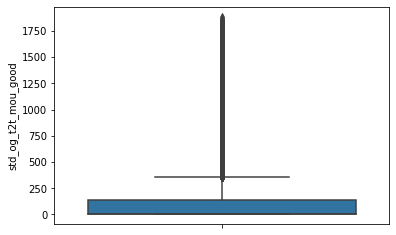

std_og_t2m_mou_good
1381.4492

0.000      4801
21.835      214
10.040      124
11.795       90
0.230        22
           ... 
50.395        1
225.645       1
13.230        1
123.260       1
142.895       1
Name: std_og_t2m_mou_good, Length: 15492, dtype: int64


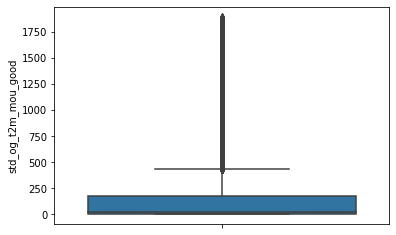

std_og_t2f_mou_good
22.566399999999994

0.000     20161
0.255        31
0.200        30
0.165        29
0.180        28
          ...  
12.775        1
17.995        1
13.030        1
8.395         1
50.415        1
Name: std_og_t2f_mou_good, Length: 2091, dtype: int64


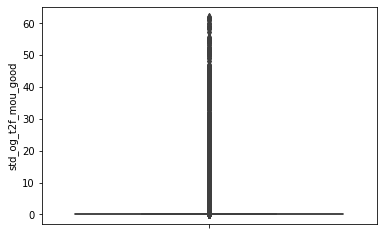

std_og_mou_good
1714.077599999998

0.0000       3607
64.0925       213
29.0200       104
35.0725        81
0.2300         23
             ... 
77.0450         1
39.1400         1
378.3750        1
1155.6850       1
886.3200        1
Name: std_og_mou_good, Length: 17569, dtype: int64


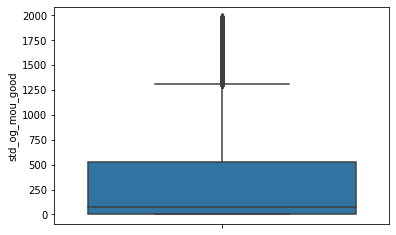

isd_og_mou_good
18.573399999999964

0.000     22700
0.005        62
0.505        57
0.125        34
0.025        32
          ...  
5.815         1
24.545        1
60.560        1
5.265         1
4.980         1
Name: isd_og_mou_good, Length: 1120, dtype: int64


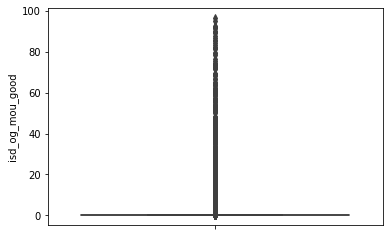

spl_og_mou_good
43.92719999999994

0.000     7180
0.560      213
0.380      177
0.180      124
0.005       89
          ... 
24.575       1
40.580       1
11.515       1
18.380       1
31.450       1
Name: spl_og_mou_good, Length: 5737, dtype: int64


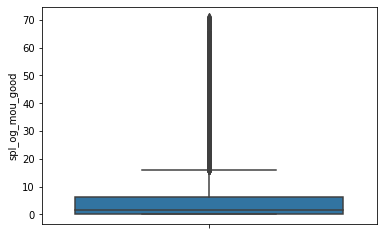

og_others_good
3.661399999999994

0.000    19532
0.105      134
0.215       57
0.100       50
0.325       46
         ...  
4.655        1
0.020        1
1.625        1
4.350        1
1.235        1
Name: og_others_good, Length: 687, dtype: int64


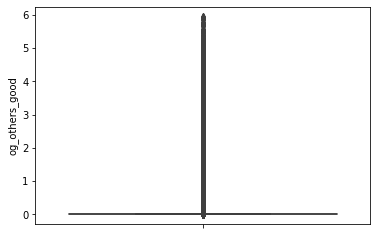

total_og_mou_good
1865.7789999999998

0.000      652
0.105        8
0.505        5
1.580        5
0.980        5
          ... 
53.420       1
6.285        1
386.675      1
514.665      1
509.165      1
Name: total_og_mou_good, Length: 23540, dtype: int64


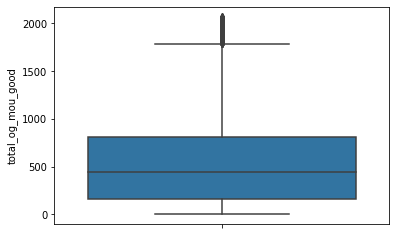

loc_ic_t2t_mou_good
404.30239999999935

0.000      674
27.205     213
13.530      76
13.675      60
0.090       13
          ... 
20.440       1
19.240       1
102.735      1
33.675       1
52.335       1
Name: loc_ic_t2t_mou_good, Length: 15900, dtype: int64


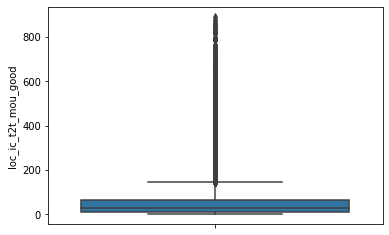

loc_ic_t2m_mou_good
677.1529999999997

0.0000      233
89.6175     213
44.7625      47
44.8550      43
40.4700       6
           ... 
337.9500      1
167.2100      1
92.5850       1
287.6750      1
39.2750       1
Name: loc_ic_t2m_mou_good, Length: 20752, dtype: int64


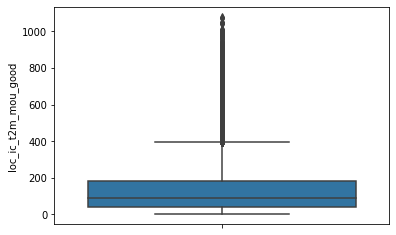

loc_ic_t2f_mou_good
139.23219999999972

0.000      5226
2.110       214
1.080       150
1.030       113
0.180        61
           ... 
40.000        1
22.000        1
13.050        1
105.865       1
44.335        1
Name: loc_ic_t2f_mou_good, Length: 8059, dtype: int64


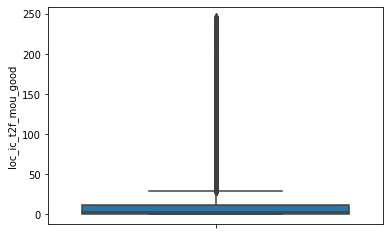

loc_ic_mou_good
895.6307999999999

143.2275    213
0.0000      175
71.4025      38
71.8250      31
57.8100       5
           ... 
65.3850       1
276.4250      1
118.0150      1
330.4750      1
82.8800       1
Name: loc_ic_mou_good, Length: 22006, dtype: int64


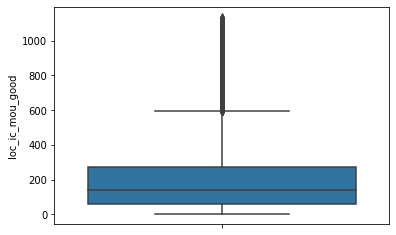

std_ic_t2t_mou_good
130.67419999999998

0.000      8122
0.645       220
0.305       175
0.340       137
0.015        67
           ... 
104.140       1
27.570        1
21.200        1
11.330        1
16.460        1
Name: std_ic_t2t_mou_good, Length: 7265, dtype: int64


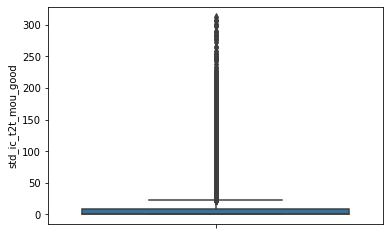

std_ic_t2m_mou_good
201.64319999999992

0.000     3786
5.875      219
2.870      122
3.005       99
0.215       38
          ... 
22.625       1
11.920       1
61.750       1
52.250       1
44.335       1
Name: std_ic_t2m_mou_good, Length: 10600, dtype: int64


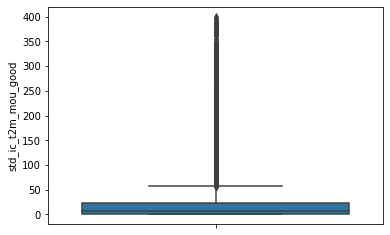

std_ic_t2f_mou_good
28.28779999999999

0.000     16562
0.240        59
0.215        58
0.100        56
0.155        56
          ...  
13.260        1
7.055         1
8.185         1
11.155        1
16.940        1
Name: std_ic_t2f_mou_good, Length: 2848, dtype: int64


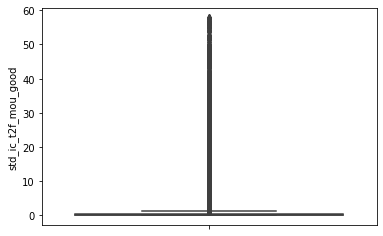

std_ic_mou_good
274.3078

0.000      2149
13.170      214
6.570       101
6.600        83
0.215        33
           ... 
271.815       1
107.190       1
12.440        1
209.440       1
44.335        1
Name: std_ic_mou_good, Length: 13007, dtype: int64


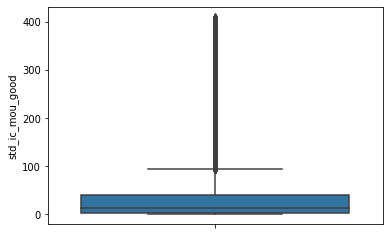

total_ic_mou_good
955.4507999999996

0.000      391
76.985       6
0.615        6
35.685       4
70.520       4
          ... 
291.590      1
286.820      1
137.720      1
709.170      1
167.135      1
Name: total_ic_mou_good, Length: 22388, dtype: int64


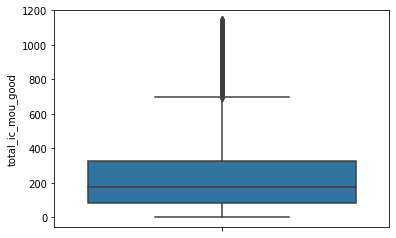

spl_ic_mou_good
0.365

0.000    19230
0.075      515
0.065      241
0.030      229
0.150      213
         ...  
0.350        1
0.465        1
0.050        1
0.200        1
0.325        1
Name: spl_ic_mou_good, Length: 141, dtype: int64


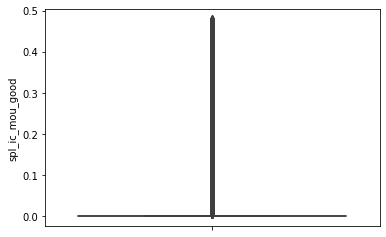

isd_ic_mou_good
113.57019999999997

0.000      17894
0.005        137
0.015         76
0.025         74
0.230         54
           ...  
114.400        1
6.055          1
4.225          1
246.780        1
19.825         1
Name: isd_ic_mou_good, Length: 3988, dtype: int64


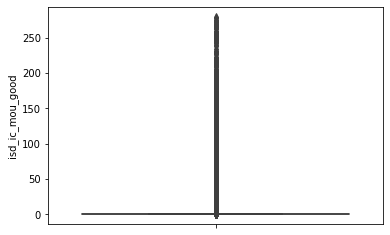

ic_others_good
12.88

0.000     16564
0.040       173
0.030       165
0.025       162
0.075       161
          ...  
6.555         1
3.560         1
5.140         1
2.920         1
21.715        1
Name: ic_others_good, Length: 1949, dtype: int64


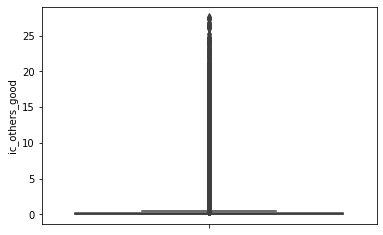

last_day_rch_amt_good
456.27999999999884

110.0    1340
0.0      1238
25.0     1160
55.0     1032
120.0     970
         ... 
289.5       1
327.0       1
161.0       1
101.5       1
323.5       1
Name: last_day_rch_amt_good, Length: 610, dtype: int64


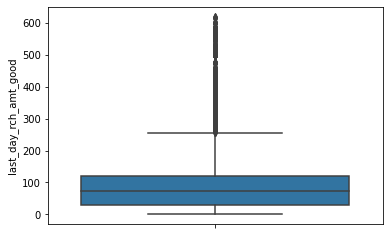

vol_2g_mb_good
1187.8977999999993

0.000      11233
0.005         55
0.010         39
0.020         28
0.015         22
           ...  
17.925         1
49.975         1
238.610        1
302.480        1
837.150        1
Name: vol_2g_mb_good, Length: 12045, dtype: int64


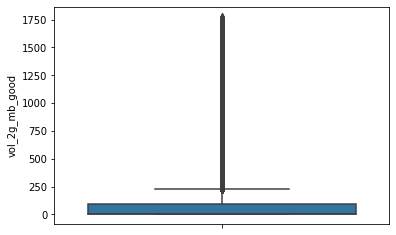

vol_3g_mb_good
2636.5875999999926

0.000       15093
0.005          19
0.010           7
0.015           5
0.030           5
            ...  
1794.775        1
577.905         1
580.185         1
1116.265        1
1394.325        1
Name: vol_3g_mb_good, Length: 10021, dtype: int64


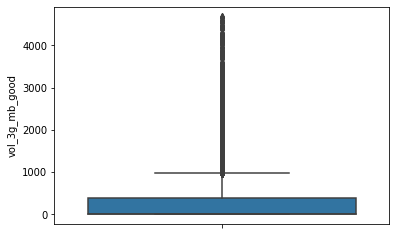

monthly_2g_good
1.5

0.0    20293
0.5     2480
1.0     1869
1.5      619
2.0       64
2.5       11
3.0        1
Name: monthly_2g_good, dtype: int64


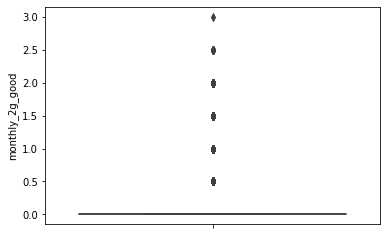

sachet_2g_good
11.5

0.0     16029
0.5      2137
1.0      1328
1.5       813
2.0       661
2.5       506
3.0       464
3.5       427
4.0       418
4.5       349
5.0       343
5.5       272
6.0       246
6.5       177
7.0       165
8.0       130
7.5       125
9.0       108
8.5       107
10.0       79
9.5        74
10.5       65
11.0       57
11.5       46
12.5       37
12.0       36
13.0       29
14.0       15
14.5       14
13.5       13
16.0       10
16.5        9
15.0        8
17.5        6
15.5        6
17.0        5
20.5        3
19.0        3
21.0        3
18.0        3
29.5        2
22.5        2
20.0        1
24.0        1
19.5        1
28.0        1
18.5        1
25.5        1
27.0        1
Name: sachet_2g_good, dtype: int64


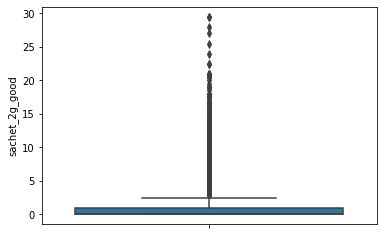

monthly_3g_good
2.0

0.0    20578
0.5     2065
1.0     1441
1.5      782
2.0      261
2.5      102
3.0       58
3.5       28
4.0        9
4.5        7
5.0        3
6.0        2
5.5        1
Name: monthly_3g_good, dtype: int64


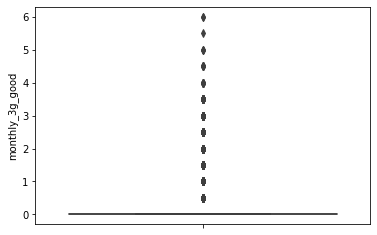

sachet_3g_good
4.0

0.0     21329
0.5      2091
1.0       846
1.5       387
2.0       172
2.5       110
3.0        78
3.5        57
4.0        50
4.5        41
5.0        34
5.5        20
6.0        19
7.0        15
6.5        13
8.0        11
11.0        7
9.5         7
9.0         6
7.5         6
10.0        5
12.0        4
14.5        4
8.5         3
15.0        3
10.5        2
11.5        2
18.5        2
12.5        2
15.5        2
13.5        2
13.0        2
27.0        1
21.5        1
25.0        1
18.0        1
17.0        1
Name: sachet_3g_good, dtype: int64


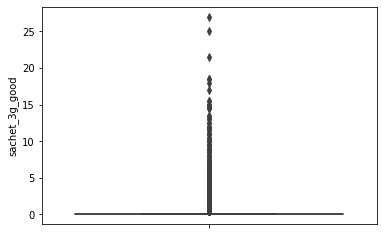

VBC_good
1464.1798

0.000      15888
0.015          6
0.010          5
0.075          4
26.765         3
           ...  
420.830        1
226.585        1
503.385        1
212.740        1
10.000         1
Name: VBC_good, Length: 9144, dtype: int64


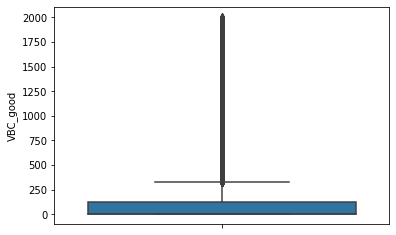

In [1160]:
continous_columns=df.select_dtypes(exclude=['object']).columns.to_list()
good = list(filter(lambda x: True if '_8' not in x else False, continous_columns))
for column in good:
    print(column)
    print(df[column].quantile(.99))
    print()
    
    print(df[column].value_counts())
    sns.boxplot(y=column,data=df)
    plt.show()

**Creating Derived Columns: Diff = Action - Good** <br>


In [1162]:
date_columns=df.select_dtypes(exclude=['object']).columns.to_list()
for  column in date_columns:
    if '_good' in column:
        column = column.replace('_good','')
        df['{}_diff'.format(column)] = df['{}_8'.format(column)] - df['{}_good'.format(column)]
        df = df.drop('{}_8'.format(column),axis=1)
        df = df.drop('{}_good'.format(column),axis=1)

In [1164]:
df.shape

(25337, 41)

In [1166]:
df.columns

Index(['fb_user_action', 'aon', 'churn', 'fb_user_good', 'onnet_mou_diff',
       'offnet_mou_diff', 'roam_ic_mou_diff', 'roam_og_mou_diff',
       'loc_og_t2t_mou_diff', 'loc_og_t2m_mou_diff', 'loc_og_t2f_mou_diff',
       'loc_og_t2c_mou_diff', 'loc_og_mou_diff', 'std_og_t2t_mou_diff',
       'std_og_t2m_mou_diff', 'std_og_t2f_mou_diff', 'std_og_mou_diff',
       'isd_og_mou_diff', 'spl_og_mou_diff', 'og_others_diff',
       'total_og_mou_diff', 'loc_ic_t2t_mou_diff', 'loc_ic_t2m_mou_diff',
       'loc_ic_t2f_mou_diff', 'loc_ic_mou_diff', 'std_ic_t2t_mou_diff',
       'std_ic_t2m_mou_diff', 'std_ic_t2f_mou_diff', 'std_ic_mou_diff',
       'total_ic_mou_diff', 'spl_ic_mou_diff', 'isd_ic_mou_diff',
       'ic_others_diff', 'last_day_rch_amt_diff', 'vol_2g_mb_diff',
       'vol_3g_mb_diff', 'monthly_2g_diff', 'sachet_2g_diff',
       'monthly_3g_diff', 'sachet_3g_diff', 'VBC_diff'],
      dtype='object')

In [ ]:
#Prepare Model 2: with PCA